# Multi-word tokenization, Stop-Wording, and Lemmatization

In [1]:
import nltk
from nltk import FreqDist
from nltk.collocations import *
from nltk.tokenize import word_tokenize
from nltk.tokenize import MWETokenizer,word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
#Read the datasets

path = "C:\\Users\\faiza\\CUS 635 Final Project\\"  #change directory to where you have articles stored
fileName = path + "EconomyArticles 2013-2019"

dataset = {}
dataset_raw = {}
allFeatures = set()
tot_articles = 0
articles_count = {}

f = open(fileName,'r')
text = ''
text_raw = ''    
lines = f.readlines()
tot_articles += len(lines)
articles_count = len(lines)
dataset_raw = list(map(lambda line: line.lower(), lines))
    
for line in lines:
    text += line.replace('\n',' ').lower()
    text_raw = line.lower()
f.close
    
tokens = nltk.word_tokenize(text)
dataset = nltk.Text(tokens)

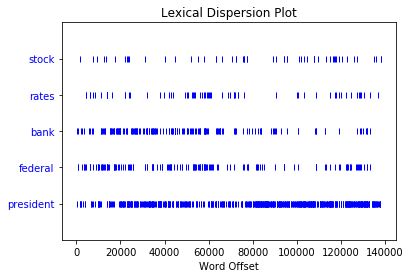

In [3]:
dataset.dispersion_plot(["stock","rates", "bank","federal","president"]) 

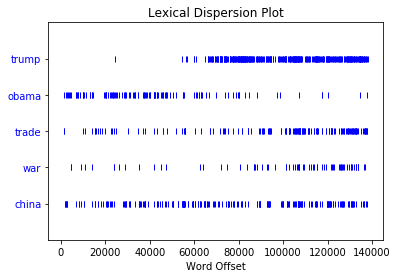

In [4]:
dataset.dispersion_plot(["trump","obama", "trade","war","china"])

In [5]:
dataset_clean = {}

def remove_punctuation(corpus):
    punctuations = ".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"    
    filtered_corpus = [token for token in corpus if (not token in punctuations)]
    return filtered_corpus

def apply_stopwording(corpus, min_len):
    #created this black list when running frequency distribution of top 20 words. Updated a few times when seeing more words that I deemed unimportant
    black_list = ['said','year','would','could','need','said','like','time','make', 'even','know','also','many','say','much','made']
    filtered_corpus = [token for token in corpus if (not token in stopwords.words('english') and not token in black_list and len(token)>min_len)]
    return filtered_corpus

#Let's remove punctuation characters and apply stopwording
dataset_clean = apply_stopwording(remove_punctuation(dataset), 3)

In [6]:
#pair of terms that work frequently together
print('Collocations')
dataset_clean = nltk.Text(dataset_clean)
dataset.collocation_list()

Collocations


[('united', 'states'),
 ('prime', 'minister'),
 ('federal', 'reserve'),
 ('new', 'york'),
 ('european', 'union'),
 ('president', 'trump'),
 ('economist', 'writes'),
 ('white', 'house'),
 ('president', 'obama'),
 ('climate', 'change'),
 ('central', 'bank'),
 ('wall', 'street'),
 ('real', 'estate'),
 ('interest', 'rates'),
 ('health', 'care'),
 ('north', 'korea'),
 ('saudi', 'arabia'),
 ('trade', 'war'),
 ('trump', 'administration'),
 ('hong', 'kong')]

In [7]:
from nltk.collocations import *
from nltk.util import ngrams

print ('Generating bigrams')
bigrams = ngrams(dataset_clean,2)
for bigram in bigrams:
    print (bigram)

Generating bigrams
('brahmaputra', 'river')
('river', 'system')
('system', 'planners')
('planners', 'face')
('face', 'hobson')
('hobson', 'choice')
('choice', 'twin')
('twin', 'goals')
('goals', 'climate')
('climate', 'change')
('change', 'adaptation')
('adaptation', 'mitigation')
('mitigation', 'times')
('times', 'washington')
('washington', 'bureau')
('bureau', 'chief')
('chief', 'magazine')
('magazine', 'contributor')
('contributor', 'explains')
('explains', 'decided')
('decided', 'write')
('write', 'e-book')
('e-book', 'ships')
('ships', 'enough')
('enough', 'cargo')
('cargo', 'sent')
('sent', 'ship')
('ship', 'values')
('values', 'plummeting')
('plummeting', 'worth')
('worth', 'european')
('european', 'banks')
('banks', 'lent')
('lent', 'build')
('build', 'battle')
('battle', 'dell')
('dell', 'suggests')
('suggests', 'investors')
('investors', 'today')
('today', 'slightly')
('slightly', 'less')
('less', 'short-term')
('short-term', 'greedy')
('greedy', 'previous')
('previous', 'ge

('operates.', 'avoid')
('avoid', 'union')
('union', 'opposition')
('opposition', 'postwar')
('postwar', 'temp')
('temp', 'industry')
('industry', 'exploited')
('exploited', 'cultural')
('cultural', 'ambivalence')
('ambivalence', 'middle-class')
('middle-class', 'white')
('white', 'women')
('women', 'work')
('work', 'became')
('became', 'model')
('model', 'corporate')
('corporate', 'america')
('america', 'senate')
('senate', 'republican')
('republican', 'leader')
('leader', 'mitch')
('mitch', 'mcconnell')
('mcconnell', 'clear')
('clear', 'three')
('three', 'television')
('television', 'appearances')
('appearances', 'oppose')
('oppose', 'effort')
('effort', 'obama')
('obama', 'administration')
('administration', 'increase')
('increase', 'revenue')
('revenue', 'remained')
('remained', 'focused')
('focused', 'finding')
('finding', 'ways')
('ways', 'spending')
('spending', 'government')
('government', 'grapples')
('grapples', 'debilitating')
('debilitating', 'debt')
('debt', 'urban')
('urba

('lending', 'starting')
('starting', 'flash')
('flash', 'warning')
('warning', 'signs')
('signs', 'concern')
('concern', 'banks')
('banks', 'making')
('making', 'loans')
('loans', 'businesses')
('businesses', 'rates')
('rates', 'unprofitable')
('unprofitable', 'lenders')
('lenders', 'citigroup')
('citigroup', 'agreed')
('agreed', 'thursday')
('thursday', 'sell')
('sell', 'consumer')
('consumer', 'banking')
('banking', 'business')
('business', 'turkey')
('turkey', 'local')
('local', 'lender')
('lender', 'denizbank')
('denizbank', 'continues')
('continues', 'reduce')
('reduce', 'operations')
('operations', 'outside')
('outside', 'united')
('united', 'states')
('states', 'power')
('power', 'women')
('women', 'inevitable')
('inevitable', 'good')
('good', 'thing')
('thing', 'economist')
('economist', 'writes')
('writes', 'apple')
('apple', 'silicon')
('silicon', 'valley')
('valley', 'several')
('several', 'small')
('small', 'companies')
('companies', 'nonprofits')
('nonprofits', 'working')


('stock', 'market')
('market', 'appears')
('appears', 'turned')
('turned', 'corner')
('corner', 'stocks')
('stocks', 'expensive')
('expensive', 'individual')
('individual', 'nations')
('nations', 'markets')
('markets', 'taken')
('taken', 'divergent')
('divergent', 'paths')
('paths', 'cheap')
('cheap', 'right')
('right', 'america')
('america', 'learn')
('learn', 'strange')
('strange', 'genius')
('genius', 'texas')
('texas', 'erica')
('erica', 'greider')
('greider', 'counters')
('counters', 'stereotypes')
('stereotypes', 'state')
('state', 'explains')
('explains', 'economy')
('economy', 'thriving')
('thriving', 'ambitious')
('ambitious', 'project')
('project', 'route')
('route', 'water')
('water', 'turkey')
('turkey', 'using')
('using', 'experimental')
('experimental', 'technology')
('technology', 'pipeline')
('pipeline', 'mediterranean')
('mediterranean', 'steep')
('steep', 'devaluation')
('devaluation', 'egyptian')
('egyptian', 'pound')
('pound', 'lack')
('lack', 'hard')
('hard', 'curr

('percent', 'announced')
('announced', 'strong')
('strong', 'second-quarter')
('second-quarter', 'gains')
('gains', 'approval')
('approval', 'repurchase')
('repurchase', 'million')
('million', 'worth')
('worth', 'stock')
('stock', 'affordable')
('affordable', 'care')
('care', 'part-time')
('part-time', 'employment')
('employment', 'attractive')
('attractive', 'workers')
('workers', 'economist')
('economist', 'writes')
('writes', 'evidence')
('evidence', 'explains')
('explains', 'netherlands')
('netherlands', 'tried')
('tried', 'freedmen')
('freedmen', 'colonize')
('colonize', 'suriname')
('suriname', 'artist')
('artist', 'documented')
('documented', 'jet-set')
('jet-set', 'lifestyle')
('lifestyle', 'manhattan')
('manhattan', 'paris')
('paris', 'succumbing')
('succumbing', 'aids')
('aids', '1988')
('1988', 'subject')
('subject', 'auction')
('auction', 'window')
('window', 'displays')
('displays', 'book')
('book', 'without')
('without', 'earlier')
('earlier', 'manufacturing')
('manufactu

('deal-making', 'economic')
('economic', 'reform')
('reform', 'experimenting')
('experimenting', 'outspoken')
('outspoken', 'advocate')
('advocate', 'changing')
('changing', 'education')
('education', 'system')
('system', 'produce')
('produce', 'graduates')
('graduates', 'tech')
('tech', 'skills')
('skills', 'nation')
('nation', 'trying')
('trying', 'clean')
('clean', 'thousands')
('thousands', 'homes')
('homes', 'housing')
('housing', 'bubble')
('bubble', 'burst')
('burst', 'never')
('never', 'finished')
('finished', 'substandard')
('substandard', 'recent')
('recent', 'years')
('years', 'cubans')
('cubans', 'close')
('close', 'communist')
('communist', 'government')
('government', 'begun')
('begun', 'talking')
('talking', 'openly')
('openly', 'economy')
('economy', 'political')
('political', 'leadership')
('leadership', 'restrictions')
('restrictions', 'resent')
('resent', 'repeated')
('repeated', 'strikes')
('strikes', 'fast-food')
('fast-food', 'restaurants')
('restaurants', 'called

('vista', 'threatened')
('threatened', 'development')
('development', 'remember')
('remember', '2013')
('2013', 'fill')
('fill', 'blanks')
('blanks', 'guesses')
('guesses', 'choose')
('choose', 'scrambled')
('scrambled', 'list')
('list', 'answers')
('answers', 'question')
('question', 'links')
('links', 'times')
('times', 'article')
('article', 'answer')
('answer', 'found')
('found', 'whether')
('whether', 'employer')
('employer', 'seeker')
('seeker', 'times')
('times', 'wants')
('wants', 'hear')
('hear', 'stories')
('stories', 'juhapura')
('juhapura', 'female')
('female', 'participation')
('participation', 'political')
('political', 'process')
('process', 'limited')
('limited', 'cultural')
('cultural', 'pressure')
('pressure', 'avoid')
('avoid', 'political')
('political', 'topics')
('topics', 'lack')
('lack', 'spaces')
('spaces', 'women')
('women', 'freely')
('freely', 'express')
('express', 'shift')
('shift', 'rainmakers')
('rainmakers', 'wall')
('wall', 'street')
('street', 'asset')

('showcase', 'grace')
('grace', 'economic')
('economic', 'pressure')
('pressure', 'senator')
('senator', 'charles')
('charles', 'schumer')
('schumer', 'says')
('says', 'democrats')
('democrats', 'enough')
('enough', 'counter')
('counter', 'party')
('party', 'drive')
('drive', 'wedge')
('wedge', 'elite')
('elite', 'middle-income')
('middle-income', 'members')
('members', 'ghost')
('ghost', 'sportier')
('sportier', 'entry-level')
('entry-level', 'rolls-royce')
('rolls-royce', 'sedan')
('sedan', 'extended')
('extended', 'wheelbase')
('wheelbase', 'version')
('version', 'adds')
('adds', 'inches')
('inches', 'length')
('length', 'resulting')
('resulting', 'huge')
('huge', 'back')
('back', 'seat')
('seat', 'speech')
('speech', 'german')
('german', 'parliament')
('parliament', 'chancellor')
('chancellor', 'angela')
('angela', 'merkel')
('merkel', 'wednesday')
('wednesday', 'washington')
('washington', 'undermined')
('undermined', 'international')
('international', 'standing')
('standing', 'eu

('openness', 'inclusion')
('inclusion', 'simultaneously')
('simultaneously', 'cracking')
('cracking', 'president')
('president', 'obama')
('obama', 'declaring')
('declaring', 'americans')
('americans', 'spent')
('spent', 'long')
('long', 'working')
('working', 'earning')
('earning', 'less')
('less', 'millions')
('millions', 'workers')
('workers', 'eligible')
('eligible', 'extra')
('extra', 'paris')
('paris', 'saint-germain')
('saint-germain', 'operate')
('operate', 'norms')
('norms', 'soccer')
('soccer', 'finance')
('finance', 'chelsea')
('chelsea', 'manchester')
('manchester', 'city')
('city', 'investment')
('investment', 'project')
('project', 'foreigners')
('foreigners', 'billions')
('billions', 'lavish')
('lavish', 'debate')
('debate', 'government')
('government', 'role')
('role', 'creating')
('creating', 'opportunity')
('opportunity', 'ending')
('ending', 'deprivation')
('deprivation', 'flared')
('flared', 'anew')
('anew', 'inequality')
('inequality', 'acute')
('acute', 'roaring')

('spent', 'years')
('years', 'building')
('building', 'bassoons')
('bassoons', 'inventing')
('inventing', 'unusual')
('unusual', 'instruments')
('instruments', 'sprawling')
('sprawling', 'factory')
('factory', 'maine')
('maine', 'public')
('public', 'funding')
('funding', 'arts')
('arts', 'fallen')
('fallen', 'cuts')
('cuts', 'seem')
('seem', 'likely')
('likely', 'arts')
('arts', 'executives')
('executives', 'displayed')
('displayed', 'kind')
('kind', 'wartime')
('wartime', 'spirit')
('spirit', 'finding')
('finding', 'ways')
('ways', 'raise')
('raise', 'money')
('money', 'europe')
('europe', 'voters')
('voters', 'send')
('send', 'message')
('message', 'dismay')
('dismay', 'governing')
('governing', 'parties')
('parties', 'extremist')
('extremist', 'parties')
('parties', 'eroding')
('eroding', 'center-left')
('center-left', 'center-right')
('center-right', 'core')
('core', 'national')
('national', 'politics')
('politics', 'russia')
('russia', 'everything')
('everything', 'wrong')
('wron

('slowly', 'image')
('image', 'issues')
('issues', 'affect')
('affect', 'male')
('male', 'female')
('female', 'leaders')
('leaders', 'latest')
('latest', 'debate')
('debate', 'president')
('president', 'françois')
('françois', 'hollande')
('hollande', 'france')
('france', 'glasses')
('glasses', 'rural')
('rural', 'connecticut')
('connecticut', 'program')
('program', 'teaches')
('teaches', 'perennials')
('perennials', 'permaculture')
('permaculture', 'pickling')
('pickling', 'work')
('work', 'sabbath')
('sabbath', 'slowness')
('slowness', 'effort')
('effort', 'reduce')
('reduce', 'risk')
('risk', 'important')
('important', 'sector')
('sector', 'depressing')
('depressing', 'indication')
('indication', 'overall')
('overall', 'state')
('state', 'affairs')
('affairs', 'financial')
('financial', 'system')
('system', 'financial')
('financial', 'problems')
('problems', 'powerful')
('powerful', 'family')
('family', 'given')
('given', 'investors')
('investors', 'reminder')
('reminder', 'difficul

('scotland', 'another')
('another', 'sign')
('sign', 'widespread')
('widespread', 'dissatisfaction')
('dissatisfaction', 'established')
('established', 'order')
('order', 'failed')
('failed', 'deliver')
('deliver', 'global')
('global', 'commission')
('commission', 'challenging')
('challenging', 'widespread')
('widespread', 'belief')
('belief', 'efforts')
('efforts', 'reduce')
('reduce', 'global')
('global', 'warming')
('warming', 'carry')
('carry', 'steep')
('steep', 'price')
('price', 'french')
('french', 'leaders')
('leaders', 'facing')
('facing', 'pressure')
('pressure', 'weakened')
('weakened', 'economy')
('economy', 'continuing')
('continuing', 'austerity')
('austerity', 'push')
('push', 'german')
('german', 'chancellor')
('chancellor', 'angela')
('angela', 'merkel')
('merkel', 'plentiful')
('plentiful', 'jobs')
('jobs', 'good')
('good', 'critical')
('critical', 'underpinning')
('underpinning', 'strong')
('strong', 'economy')
('economy', 'still')
('still', 'cards')
('cards', 'hist

('russia', 'influence')
('influence', 'former')
('former', 'soviet')
('soviet', 'republic')
('republic', 'move')
('move', 'extends')
('extends', 'iovine')
('iovine', 'wide')
('wide', 'reach')
('reach', 'entertainment')
('entertainment', 'technology')
('technology', 'another')
('another', 'round')
('round', 'fiscal')
('fiscal', 'brinkmanship')
('brinkmanship', 'looms')
('looms', 'republican')
('republican', 'control')
('control', 'congress')
('congress', 'impact')
('impact', 'policy')
('policy', 'government')
('government', 'programs')
('programs', 'overall')
('overall', 'economy')
('economy', 'severe')
('severe', 'states')
('states', 'school')
('school', 'districts')
('districts', 'falling')
('falling', 'short')
('short', 'legal')
('legal', 'obligation')
('obligation', 'provide')
('provide', 'children')
('children', 'equal')
('equal', 'resources')
('resources', 'regardless')
('regardless', 'race')
('race', 'america')
('america', 'build')
('build', 'infrastructure')
('infrastructure', '

('business', 'owners')
('owners', 'hate')
('hate', 'holidays')
('holidays', 'ruble')
('ruble', 'hiring')
('hiring', 'sants')
('sants', 'coup')
('coup', 'oliver')
('oliver', 'wyman')
('wyman', 'large')
('large', 'well')
('well', 'known')
('known', 'outside')
('outside', 'united')
('united', 'states')
('states', 'rival')
('rival', 'mckinsey')
('mckinsey', 'consulting')
('consulting', 'industry')
('industry', 'readers')
('readers', 'vented')
('vented', 'frustration')
('frustration', 'political')
('political', 'system')
('system', 'cheered')
('cheered', 'elizabeth')
('elizabeth', 'warren')
('warren', 'combative')
('combative', 'rhetoric')
('rhetoric', 'status')
('status', 'reaction')
('reaction', 'david')
('david', 'brooks')
('brooks', 'column')
('column', 'warren')
('warren', 'win.')
('win.', 'eight')
('eight', 'states')
('states', 'including')
('including', 'utah')
('utah', 'investigated')
('investigated', 'zenefits')
('zenefits', 'three')
('three', 'cleared')
('cleared', 'decisions')
('

('based', 'misinterpretation')
('misinterpretation', 'data')
('data', 'killing')
('killing', 'boris')
('boris', 'nemtsov')
('nemtsov', 'leaves')
('leaves', 'russia')
('russia', 'critics')
('critics', 'crossroads')
('crossroads', 'whether')
('whether', 'take')
('take', 'role')
('role', 'nation')
('nation', 'political')
('political', 'life')
('life', 'welcome')
('welcome', 'president')
('president', 'maduro')
('maduro', 'hall')
('hall', 'mirrors')
('mirrors', 'economic')
('economic', 'mismanagement')
('mismanagement', 'interview')
('interview', 'aired')
('aired', 'sunday')
('sunday', 'president')
('president', 'obama')
('obama', 'gaps')
('gaps', 'still')
('still', 'existed')
('existed', 'reaching')
('reaching', 'termed')
('termed', 'extraordinarily')
('extraordinarily', 'reasonable')
('reasonable', 'deal')
('deal', 'hinted')
('hinted', 'optimism')
('optimism', 'despite')
('despite', 'concerns')
('concerns', 'terms')
('terms', 'home')
('home', 'israel')
('israel', 'story')
('story', 'york

('ambitions', 'asia')
('asia', 'radical-left')
('radical-left', 'government')
('government', 'pretty')
('pretty', 'exhausted')
('exhausted', 'techniques')
('techniques', 'squeezing')
('squeezing', 'blood')
('blood', 'stone')
('stone', 'gems')
('gems', 'week')
('week', 'include')
('include', 'look')
('look', 'effective')
('effective', 'police')
('police', 'department')
('department', 'solving')
('solving', 'crime')
('crime', 'comic')
('comic', 'strip')
('strip', 'takes')
('takes', 'economists')
('economists', 'agreeing')
('agreeing', 'talks')
('talks', 'pivotal')
('pivotal', 'american')
('american', 'experts')
('experts', 'predict')
('predict', 'political')
('political', 'impact')
('impact', 'accord')
('accord', 'tehran')
('tehran', 'complex')
('complex', 'internal')
('internal', 'politics')
('politics', 'proliferation')
('proliferation', 'power')
('power', 'graduate')
('graduate', 'degrees')
('degrees', 'creative')
('creative', 'writing')
('writing', 'inspired')
('inspired', 'heated')


('sites', 'notable')
('notable', 'attacks')
('attacks', 'recent')
('recent', 'years')
('years', 'upshot')
('upshot', 'began')
('began', 'publication')
('publication', 'april')
('april', '2014')
('2014', 'published')
('published', '1,500')
('1,500', 'articles')
('articles', 'first')
('first', 'celebrate')
('celebrate', 'first')
('first', 'birthday')
('birthday', 'together')
('together', 'list')
('list', 'most-read')
('most-read', 'pieces')
('pieces', 'times')
('times', 'produced')
('produced', 'articles')
('articles', 'including')
('including', 'front-page')
('front-page', 'stories')
('stories', 'inside')
('inside', 'ebola-afflicted')
('ebola-afflicted', 'countries')
('countries', 'sample')
('sample', 'work')
('work', 'anyway')
('anyway', 'cruise')
('cruise', 'industry')
('industry', 'contributing')
('contributing', 'record')
('record', 'amount')
('amount', 'economies')
('economies', 'europe')
('europe', 'passenger')
('passenger', 'numbers')
('numbers', 'moer')
('moer', 'percent')
('per

('economy', 'invariably')
('invariably', 'becomes')
('becomes', 'political')
('political', 'target')
('target', 'left')
('left', 'right')
('right', 'white')
('white', 'house')
('house', 'incumbent')
('incumbent', 'running')
('running', 're-election')
('re-election', 'author')
('author', 'sunday')
('sunday', 'review')
('review', 'essay')
('essay', 'water')
('water', 'conservation')
('conservation', 'responds')
('responds', 'readers')
('readers', 'questions')
('questions', 'authorities')
('authorities', 'described')
('described', 'security')
('security', 'footage')
('footage', 'potential')
('potential', 'suspect')
('suspect', 'attack')
('attack', 'based')
('based', 'dozen')
('dozen', 'cameras')
('cameras', 'result')
('result', 'increases')
('increases', 'likelihood')
('likelihood', 'careful')
('careful', 'accounting')
('accounting', 'rajapaksa')
('rajapaksa', 'decade')
('decade', 'power')
('power', 'investment')
('investment', 'bank')
('bank', 'joins')
('joins', 'long')
('long', 'list')


('economy', 'sonia')
('sonia', 'legg')
('legg', 'reports')
('reports', 'raft')
('raft', 'china')
('china', 'data')
('data', 'weekend')
('weekend', 'paint')
('paint', 'positive')
('positive', 'picture')
('picture', 'world')
('world', 'second-largest')
('second-largest', 'economy')
('economy', 'pressure')
('pressure', 'beijing')
('beijing', 'ease')
('ease', 'policy')
('policy', 'ryan')
('ryan', 'brooks')
('brooks', 'reports')
('reports', 'falling')
('falling', 'commodity')
('commodity', 'prices')
('prices', 'pulled')
('pulled', 'britain')
('britain', 'ftse')
('ftse', 'percent')
('percent', 'china')
('china', 'economy')
('economy', 'slows')
('slows', 'hayley')
('hayley', 'platt')
('platt', 'reports')
('reports', 'fears')
('fears', 'china')
('china', 'economy')
('economy', 'kept')
('kept', 'markets')
('markets', 'pressure')
('pressure', 'ahead')
('ahead', 'minutes')
('minutes', 'last')
('last', 'month')
('month', 'u.s.')
('u.s.', 'federal')
('federal', 'reserve')
('reserve', 'meeting')
('m

('bold', 'detail')
('detail', 'thousands')
('thousands', 'migrants')
('migrants', 'especially')
('especially', 'eritrea')
('eritrea', 'ethiopia')
('ethiopia', 'reach')
('reach', 'sudan')
('sudan', 'every')
('every', 'hoping')
('hoping', 'earn')
('earn', 'money')
('money', 'smuggler')
('smuggler', 'passage')
('passage', 'libya')
('libya', 'ultimately')
('ultimately', 'europe')
('europe', 'growing')
('growing', 'body')
('body', 'research')
('research', 'confirms')
('confirms', 'attention')
('attention', 'children')
('children', 'parents')
('parents', 'better')
('better', 'life')
('life', 'work')
('work', 'measure')
('measure', 'avert')
('avert', 'government')
('government', 'default')
('default', 'nearly')
('nearly', 'five')
('five', 'years')
('years', 'pitched')
('pitched', 'battles')
('battles', 'fiscal')
('fiscal', 'policy')
('policy', 'music')
('music', 'drama')
('drama', 'combines')
('combines', 'aspects')
('aspects', 'theater')
('theater', 'opera')
('opera', 'bunraku')
('bunraku', 

('plan', 'aimed')
('aimed', 'extracting')
('extracting', 'money')
('money', 'companies')
('companies', 'mining')
('mining', 'federal')
('federal', 'land')
('land', 'using')
('using', 'revenue')
('revenue', 'help')
('help', 'coal')
('coal', 'communities')
('communities', 'train')
('train', 'jobs')
('jobs', 'focus')
('focus', 'national')
('national', 'security')
('security', 'economy')
('economy', 'health')
('health', 'care')
('care', 'poverty')
('poverty', 'constitution')
('constitution', 'meeting')
('meeting', 'baltimore')
('baltimore', 'obama')
('obama', 'administration')
('administration', 'yielded')
('yielded', 'opposition')
('opposition', 'coastal')
('coastal', 'communities')
('communities', 'virginia')
('virginia', 'georgia')
('georgia', 'dashed')
('dashed', 'hopes')
('hopes', 'states')
('states', 'leaders')
('leaders', 'fleetcor')
('fleetcor', 'based')
('based', 'georgia')
('georgia', 'impressed')
('impressed', 'acquisition')
('acquisition', 'serviços')
('serviços', 'tecnologia')

('primary', 'offered')
('offered', 'proposals')
('proposals', 'strip')
('strip', 'benefits')
('benefits', 'companies')
('companies', 'move')
('move', 'jobs')
('jobs', 'overseas')
('overseas', 'white')
('white', 'house')
('house', 'denies')
('denies', 'internal')
('internal', 'disagreement')
('disagreement', 'legal')
('legal', 'battle')
('battle', 'apple')
('apple', 'differences')
('differences', 'administration')
('administration', 'become')
('become', 'increasingly')
('increasingly', 'apparent')
('apparent', 'generations')
('generations', 'fans')
('fans', 'offered')
('offered', 'recollections')
('recollections', 'images')
('images', 'personal')
('personal', 'dylan')
('dylan', 'archives')
('archives', 'vinyl')
('vinyl', 'records')
('records', 'mother')
('mother', 'autograph')
('autograph', 'backstage')
('backstage', 'bottle')
('bottle', 'bourbon')
('bourbon', 'scholars')
('scholars', 'distill')
('distill', 'rival')
('rival', 'theories')
('theories', 'fleshed')
('fleshed', 'hillary')
('

('though', 'market')
('market', 'watchers')
('watchers', 'expect')
('expect', 'moderate')
('moderate', 'price')
('price', 'increases')
('increases', 'primarily')
('primarily', 'short')
('short', 'supply')
('supply', 'walkout')
('walkout', 'came')
('came', 'meeting')
('meeting', 'eurozone')
('eurozone', 'finance')
('finance', 'ministers')
('ministers', 'athens')
('athens', 'hopes')
('hopes', 'help')
('help', 'unlock')
('unlock', 'bailout')
('bailout', 'loans')
('loans', 'topol')
('topol', 'recently')
('recently', 'directed')
('directed', 'ironbound')
('ironbound', 'rattlestick')
('rattlestick', 'take')
('take', 'theater')
('theater', 'company')
('company', 'king')
('king', 'salman')
('salman', 'issued')
('issued', 'wave')
('wave', 'royal')
('royal', 'decrees')
('decrees', 'replacing')
('replacing', 'number')
('number', 'ministers')
('ministers', 'restructuring')
('restructuring', 'government')
('government', 'bodies')
('bodies', 'activist')
('activist', 'shareholders')
('shareholders', 

('horizon', 'drivers')
('drivers', 'quit')
('quit', 'early')
('early', 'days')
('days', 'hourly')
('hourly', 'wage')
('wage', 'high')
('high', 'work')
('work', 'longer')
('longer', 'opposite')
('opposite', 'economic')
('economic', 'rationality')
('rationality', 'seem')
('seem', 'dictate')
('dictate', 'lawmakers')
('lawmakers', 'criticized')
('criticized', 'companies')
('companies', 'avoid')
('avoid', 'taxes')
('taxes', 'moving')
('moving', 'overseas')
('overseas', 'rallying')
('rallying', 'apple')
('apple', 'defense')
('defense', 'demand')
('demand', '14.5')
('14.5', 'billion')
('billion', 'back')
('back', 'taxes')
('taxes', 'decision')
('decision', 'european')
('european', 'commissioner')
('commissioner', 'competition')
('competition', 'ramps')
('ramps', 'trans-atlantic')
('trans-atlantic', 'tensions')
('tensions', 'companies')
('companies', 'global')
('global', 'operations')
('operations', 'countries')
('countries', 'business')
('business', 'despite')
('despite', 'last-minute')
('las

('still', 'left')
('left', 'millions')
('millions', 'descending')
('descending', 'national')
('national', 'parks')
('parks', 'tension')
('tension', 'access')
('access', 'preservation')
('preservation', 'becomes')
('becomes', 'strained')
('strained', 'americans')
('americans', 'feeling')
('feeling', 'richer')
('richer', 'spending')
('spending', 'money')
('money', 'weak')
('weak', 'productivity')
('productivity', 'growth')
('growth', 'grave')
('grave', 'threat')
('threat', 'potential')
('potential', 'intolerance')
('intolerance', 'lies')
('lies', 'logic')
('logic', 'religions')
('religions', 'christianity')
('christianity', 'islam')
('islam', 'claim')
('claim', 'based')
('based', 'divine')
('divine', 'revelation')
('revelation', 'drop')
('drop', 'marriage')
('marriage', 'stems')
('stems', 'part')
('part', 'china')
('china', 'aging')
('aging', 'population')
('population', 'reflects')
('reflects', 'women')
('women', 'pushed')
('pushed', 'exploring')
('exploring', 'options')
('options', 'ac

('critical', 'tests')
('tests', '2017')
('2017', 'none')
('none', 'important')
('important', 'french')
('french', 'presidential')
('presidential', 'election')
('election', 'fierce')
('fierce', 'opponent')
('opponent', 'bloc')
('bloc', 'leading')
('leading', 'contender')
('contender', 'swelling')
('swelling', 'confidence')
('confidence', 'come')
('come', 'political')
('political', 'party')
('party', 'consumers')
('consumers', 'business')
('business', 'leaders')
('leaders', 'wall')
('wall', 'street')
('street', 'show')
('show', 'excitement')
('excitement', 'longer-term')
('longer-term', 'bond')
('bond', 'yields')
('yields', 'near')
('near', 'highs')
('highs', 'cycle')
('cycle', 'environment')
('environment', 'riskier')
('riskier', 'assets')
('assets', 'high-yield')
('high-yield', 'bonds')
('bonds', 'bank')
('bank', 'loans')
('loans', 'stocks')
('stocks', 'remains')
('remains', 'positive')
('positive', 'tillerson')
('tillerson', 'line')
('line', 'secretary')
('secretary', 'state')
('state

('figures', 'james')
('james', 'baker')
('baker', 'says')
('says', 'taxing')
('taxing', 'carbon')
('carbon', 'emissions')
('emissions', 'fairest')
('fairest', 'address')
('address', 'warming')
('warming', 'climate')
('climate', 'traditional')
('traditional', 'pensions')
('pensions', 'grown')
('grown', 'scarcer')
('scarcer', 'life')
('life', 'expectancies')
('expectancies', 'generally')
('generally', 'greater')
('greater', 'workers')
('workers', 'ages')
('ages', 'planning')
('planning', 'important')
('important', 'ever')
('ever', 'people')
('people', 'demand')
('demand', 'pervasive')
('pervasive', 'bribery')
('bribery', 'warps')
('warps', 'political')
('political', 'culture')
('culture', 'saps')
('saps', 'economy')
('economy', 'takes')
('takes', 'compromise-oriented')
('compromise-oriented', 'technocrats')
('technocrats', 'policy')
('policy', 'pass')
('pass', 'laws')
('laws', 'kinds')
('kinds', 'republicans')
('republicans', 'congress')
('congress', 'today')
('today', 'trump')
('trump',

('paid', 'centrists')
('centrists', 'iran')
('iran', 'harder')
('harder', 'without')
('without', 'ayatollah')
('ayatollah', 'rafsanjani')
('rafsanjani', 'help')
('help', 'vague')
('vague', 'promises')
('promises', 'enough')
('enough', 'considering')
('considering', 'enormous')
('enormous', 'changes')
('changes', 'trillion')
('trillion', 'medical')
('medical', 'economy')
('economy', 'though')
('though', 'president-elect')
('president-elect', 'donald')
('donald', 'trump')
('trump', 'railed')
('railed', 'media')
('media', 'company')
('company', 'mergers')
('mergers', 'conservatives')
('conservatives', 'liberals')
('liberals', 'proof')
('proof', 'worry')
('worry', 'rise')
('rise', 'megacompanies')
('megacompanies', 'mexico')
('mexico', 'must')
('must', 'prepared')
('prepared', 'shed')
('shed', 'historically')
('historically', 'conciliatory')
('conciliatory', 'stance')
('stance', 'decades')
('decades', 'state')
('state', 'facing')
('facing', 'stresses')
('stresses', 'ethnic')
('ethnic', 'cu

('needed', 'underwear')
('underwear', 'house')
('house', 'tombstone')
('tombstone', 'dining')
('dining', 'room')
('room', 'store')
('store', 'catalog')
('catalog', 'russians')
('russians', 'thought')
('thought', 'white')
('white', 'house')
('house', 'relations')
('relations', 'countries')
('countries', 'tense')
('tense', 'ever')
('ever', 'despite')
('despite', 'slow')
('slow', 'month')
('month', 'overall')
('overall', 'market')
('market', 'steady')
('steady', 'wrongheaded')
('wrongheaded', 'policy')
('policy', 'change')
('change', 'people')
('people', 'nutrition')
('nutrition', 'geeks')
('geeks', 'philosophers')
('philosophers', 'using')
('using', 'metaphor')
('metaphor', 'software')
('software', 'describe')
('describe', 'world')
('world', 'investigation')
('investigation', 'sales')
('sales', 'scandal')
('scandal', 'bank')
('bank', 'former')
('former', 'executives')
('executives', 'must')
('must', 'repay')
('repay', 'million')
('million', 'compensation')
('compensation', 'fundamental')

('states', 'since')
('since', '2005')
('2005', 'caused')
('caused', 'flooding')
('flooding', 'vast')
('vast', 'area')
('area', 'officials')
('officials', 'scrambling')
('scrambling', 'assess')
('assess', 'damage')
('damage', 'conference')
('conference', 'economic')
('economic', 'policy')
('policy', 'makers')
('makers', 'usually')
('usually', 'discuss')
('discuss', 'fuel')
('fuel', 'growth')
('growth', 'instead')
('instead', 'worried')
('worried', 'threats')
('threats', 'protectionism')
('protectionism', 'deregulation')
('deregulation', 'debt')
('debt', 'ceiling')
('ceiling', 'talks')
('talks', 'brexit')
('brexit', 'intensify')
('intensify', 'mrs.')
('mrs.', 'seeking')
('seeking', 'reassert')
('reassert', 'authority')
('authority', 'feuding')
('feuding', 'conservative')
('conservative', 'party')
('party', 'odds')
('odds', 'stacked')
('stacked', 'ford')
('ford', 'whose')
('whose', 'works')
('works', 'included')
('included', 'playhouse')
('playhouse', 'monkey')
('monkey', 'found')
('found

('favor', 'greater')
('greater', 'number')
('number', 'smaller')
('smaller', 'transactions')
('transactions', 'deal')
('deal', 'give')
('give', 'chinese')
('chinese', 'auto')
('auto', 'industry')
('industry', 'foothold')
('foothold', 'abroad')
('abroad', 'help')
('help', 'become')
('become', 'industry')
('industry', 'force')
('force', 'fiat')
('fiat', 'chrysler')
('chrysler', 'overtures')
('overtures', 'company')
('company', 'acquisition')
('acquisition', 'whole')
('whole', 'foods')
('foods', 'sets')
('sets', 'clash')
('clash', 'vastly')
('vastly', 'different')
('different', 'visions')
('visions', 'future')
('future', 'labor')
('labor', 'commerce')
('commerce', 'department')
('department', 'revised')
('revised', 'estimate')
('estimate', 'annual')
('annual', 'growth')
('growth', 'rate')
('rate', 'president')
('president', 'trump')
('trump', 'percent')
('percent', 'target')
('target', 'better')
('better', 'first-quarter')
('first-quarter', 'pace')
('pace', 'experts')
('experts', 'still')

('illegal', 'spain')
('spain', 'constitution')
('constitution', 'rights')
('rights', 'catalonia')
('catalonia', 'spain')
('spain', 'autonomous')
('autonomous', 'regions')
('regions', 'enjoy')
('enjoy', 'carles')
('carles', 'puigdemont')
('puigdemont', 'seeking')
('seeking', 'asylum')
('asylum', 'wanted')
('wanted', 'guarantee')
('guarantee', 'fair')
('fair', 'trial')
('trial', 'separatists')
('separatists', 'declared')
('declared', 'independence')
('independence', 'spain')
('spain', 'tuesday')
('tuesday', 'kevin')
('kevin', 'león')
('león', 'confronts')
('confronts', 'crisis')
('crisis', 'capital')
('capital', 'netflix')
('netflix', 'drops')
('drops', 'kevin')
('kevin', 'spacey')
('spacey', 'house')
('house', 'cards')
('cards', 'look')
('look', 'back')
('back', 'river')
('river', 'phoenix')
('phoenix', 'loss')
('loss', 'another')
('another', 'blow')
('blow', 'islamic')
('islamic', 'state')
('state', 'sign')
('sign', 'resurgence')
('resurgence', 'syrian')
('syrian', 'army')
('army', 'ro

('decline', 'manufacturing')
('manufacturing', 'remarkably')
('remarkably', 'clear')
('clear', 'images')
('images', '19th')
('19th', 'century')
('century', 'gold')
('gold', 'rushes')
('rushes', 'companies')
('companies', 'announcing')
('announcing', 'bonuses')
('bonuses', 'result')
('result', 'cuts')
('cuts', 'remains')
('remains', 'seen')
('seen', 'money')
('money', 'filter')
('filter', 'workers')
('workers', 'years')
('years', 'come')
('come', 'plan')
('plan', 'charge')
('charge', 'drivers')
('drivers', 'entering')
('entering', 'parts')
('parts', 'manhattan')
('manhattan', 'upset')
('upset', 'officials')
('officials', 'boroughs')
('boroughs', 'transit')
('transit', 'advocates')
('advocates', 'fighting')
('fighting', 'proposal')
('proposal', 'impulse')
('impulse', 'separate')
('separate', 'economic')
('economic', 'political')
('political', 'malaise')
('malaise', 'risks')
('risks', 'missing')
('missing', 'point')
('point', 'lawmakers')
('lawmakers', 'parties')
('parties', 'state')
('st

('drive', 'systems')
('systems', 'isotope')
('isotope', 'cancer-detecting')
('cancer-detecting', 'necessity')
('necessity', 'decays')
('decays', 'within')
('within', 'days')
('days', 'north')
('north', 'america')
('america', 'company')
('company', 'rushing')
('rushing', 'build')
('build', 'plant')
('plant', 'wisconsin')
('wisconsin', 'change')
('change', 'poultry')
('poultry', 'tariffs')
('tariffs', 'applied')
('applied', 'europe')
('europe', 'half-century')
('half-century', 'account')
('account', 'expensive')
('expensive', 'gas-thirsty')
('gas-thirsty', 'pickups')
('pickups', 'american')
('american', 'driveways')
('driveways', 'today')
('today', 'canadian')
('canadian', 'readers')
('readers', 'tell')
('tell', 'view')
('view', 'nafta')
('nafta', 'describe')
('describe', 'vision')
('vision', 'canada')
('canada', 'path')
('path', 'forward')
('forward', 'government')
('government', 'foreign-owned')
('foreign-owned', 'single-brand')
('single-brand', 'retailers')
('retailers', 'meet')
('mee

('confrontation', 'think')
('think', 'technology')
('technology', 'introduced')
('introduced', 'bitcoin')
('bitcoin', 'enormous')
('enormous', 'potential')
('potential', 'number')
('number', 'countries')
('countries', 'looking')
('looking', 'influence')
('influence', 'future')
('future', 'internal')
('internal', 'analysis')
('analysis', 'council')
('council', 'economic')
('economic', 'advisers')
('advisers', 'echoes')
('echoes', 'warnings')
('warnings', 'wall')
('wall', 'street')
('street', 'academic')
('academic', 'economists')
('economists', 'president')
('president', 'trade')
('trade', 'agenda')
('agenda', 'easier')
('easier', 'comparison')
('comparison', 'shop')
('shop', 'online')
('online', 'businesses')
('businesses', 'less')
('less', 'likely')
('likely', 'raise')
('raise', 'prices')
('prices', 'looking')
('looking', 'official')
('official', 'inflation')
('inflation', 'data')
('data', 'saying')
('saying', 'president')
('president', 'trump')
('trump', 'right')
('right', 'china')
(

('construction', 'projects')
('projects', 'affluent')
('affluent', 'parents')
('parents', 'wield')
('wield', 'connections')
('connections', 'resources')
('resources', 'wreak')
('wreak', 'havoc')
('havoc', 'schools')
('schools', 'whales')
('whales', 'tells')
('tells', 'evolution')
('evolution', 'start')
('start', 'start')
('start', 'start')
('start', 'start')
('start', 'start')
('start', 'fleeting')
('fleeting', 'moments')
('moments', 'earlier')
('earlier', 'seemed')
('seemed', 'carpet')
('carpet', 'magically')
('magically', 'changed')
('changed', 'course')
('course', 'australia')
('australia', 'cultural')
('cultural', 'creative')
('creative', 'heart')
('heart', 'tech')
('tech', 'boomtown')
('boomtown', 'world')
('world', 'take')
('take', 'notice')
('notice', 'nation')
('nation', 'reds')
('reds', 'rival')
('rival', 'pricier')
('pricier', 'french')
('french', 'bottles')
('bottles', 'exports')
('exports', 'small')
('small', 'number')
('number', 'vineyards')
('vineyards', 'starting')
('sta

('president', 'trump')
('trump', 'claimed')
('claimed', 'coal')
('coal', 'indestructible')
('indestructible', 'west')
('west', 'virginia')
('virginia', 'strongest')
('strongest', 'state')
('state', 'economies')
('economies', 'u.s.')
('u.s.', 'cleanest')
('cleanest', 'country')
('country', 'planet.')
('planet.', 'none')
('none', 'true')
('true', 'president')
('president', 'speech')
('speech', 'illinois')
('illinois', 'escalated')
('escalated', 'misguided')
('misguided', 'notion')
('notion', 'trade')
('trade', 'deficit')
('deficit', 'means')
('means', 'lost')
('lost', 'wealth')
('wealth', 'claim')
('claim', 'expert')
('expert', 'says')
('says', 'defies')
('defies', 'basic')
('basic', 'economics.')
('economics.', 'signing')
('signing', 'annual')
('annual', 'funding')
('funding', 'bill')
('bill', 'president')
('president', 'trump')
('trump', 'inaccurately')
('inaccurately', 'claimed')
('claimed', 'amount')
('amount', 'historic')
('historic', 'military')
('military', 'never')
('never', 'pre

('boxes', 'blend')
('blend', 'form')
('form', 'folk')
('folk', 'function')
('function', 'community')
('community', 'water')
('water', 'cooler')
('cooler', 'popped')
('popped', 'states')
('states', 'countries')
('countries', 'statewide')
('statewide', 'results')
('results', 'alarmed')
('alarmed', 'democrats')
('democrats', '2016')
('2016', 'ohio')
('ohio', 'honing')
('honing', 'hope')
('hope', 'winning')
('winning', 'economic')
('economic', 'message')
('message', 'focused')
('focused', 'workers')
('workers', 'government')
('government', 'islamist')
('islamist', 'leaders')
('leaders', 'enraged')
('enraged', 'acquittal')
('acquittal', 'woman')
('woman', 'accused')
('accused', 'blasphemy')
('blasphemy', 'struck')
('struck', 'deal')
('deal', 'allows')
('allows', 'appeals')
('appeals', 'bars')
('bars', 'leaving')
('leaving', 'country')
('country', 'senator')
('senator', 'cruz')
('cruz', 'really')
('really', 'enjoy')
('enjoy', 'comfortable')
('comfortable', 'lead')
('lead', 'representative')


('gesture', 'taken')
('taken', 'seriously')
('seriously', 'pakistan')
('pakistan', 'cracks')
('cracks', 'terrorism')
('terrorism', 'american')
('american', 'conservatism')
('conservatism', 'trump')
('trump', 'learn')
('learn', 'state')
('state', 'nearly')
('nearly', 'three')
('three', 'agonizing')
('agonizing', 'years')
('years', 'people')
('people', 'next')
('next', 'recession')
('recession', 'civil')
('civil', 'unrest')
('unrest', 'another')
('another', 'referendum')
('referendum', 'busy')
('busy', 'week')
('week', 'american')
('american', 'politics')
('politics', 'stories')
('stories', 'might')
('might', 'missed')
('missed', 'vice')
('vice', 'president')
('president', 'mike')
('mike', 'pence')
('pence', 'commonly')
('commonly', 'seen')
('seen', 'around')
('around', 'washington')
('washington', 'mute')
('mute', 'helpmate')
('helpmate', 'bombastic')
('bombastic', 'president')
('president', 'foreign')
('foreign', 'soil')
('soil', 'toyed')
('toyed', 'idea')
('idea', 'branching')
('branc

('suggest', 'chinese')
('chinese', 'slowdown')
('slowdown', 'bottoming')
('bottoming', 'credit')
('credit', 'goes')
('goes', 'wave')
('wave', 'lending')
('lending', 'economists')
('economists', 'warn')
('warn', 'debt-fueled')
('debt-fueled', 'growth')
('growth', 'continue')
('continue', 'peter')
('peter', 'ashlock')
('ashlock', 'completed')
('completed', '25,000')
('25,000', 'trips')
('trips', 'uber')
('uber', 'insiders')
('insiders', 'cash')
('cash', 'billion')
('billion', 'public')
('public', 'offering')
('offering', 'road')
('road', 'nowhere')
('nowhere', 'decline')
('decline', 'number')
('number', 'tournaments')
('tournaments', 'u.s.')
('u.s.', 'corresponds')
('corresponds', 'decline')
('decline', 'number')
('number', 'highly')
('highly', 'ranked')
('ranked', 'americans')
('americans', 'growth')
('growth', 'tennis')
('tennis', 'europe')
('europe', 'asia')
('asia', 'tuesday')
('tuesday', 'housing')
('housing', 'bills')
('bills', 'line')
('line', 'kamala')
('kamala', 'harris')
('harr

('engaged', 'anti-competitive')
('anti-competitive', 'behavior')
('behavior', 'european')
('european', 'commission')
('commission', 'found')
('found', 'bouverie')
('bouverie', 'appeasement')
('appeasement', 'describes')
('describes', 'ways')
('ways', 'british')
('british', 'government')
('government', 'avoided')
('avoided', 'standing')
('standing', 'hitler')
('hitler', 'exiting')
('exiting', 'president')
('president', 'e.c.b')
('e.c.b', 'famously')
('famously', 'vowed')
('vowed', 'whatever')
('whatever', 'takes')
('takes', 'preserve')
('preserve', 'eurozone')
('eurozone', 'currency')
('currency', 'unclear')
('unclear', 'whether')
('whether', 'whoever')
('whoever', 'follows')
('follows', 'counted')
('counted', 'whisky')
('whisky', 'distiller')
('distiller', 'fintech')
('fintech', 'entrepreneur')
('entrepreneur', 'meet')
('meet', 'four')
('four', 'people')
('people', 'taking')
('taking', 'industries')
('industries', 'along')
('along', 'entirely')
('entirely', 'paths')
('paths', 'graphic'

('help', 'berlin')
('berlin', 'paris')
('paris', 'president')
('president', 'regarded')
('regarded', 'suspicion')
('suspicion', 'stocks')
('stocks', 'fell')
('fell', 'fourth-straight')
('fourth-straight', 'weekly')
('weekly', 'loss')
('loss', 'beijing')
('beijing', 'vowed')
('vowed', 'tariffs')
('tariffs', 'u.s.')
('u.s.', 'president')
('president', 'trump')
('trump', 'demanded')
('demanded', 'companies')
('companies', 'leave')
('leave', 'china')
('china', 'celebrities')
('celebrities', 'private')
('private', 'tutors')
('tutors', 'large')
('large', 'sums')
('sums', 'money')
('money', 'emergency')
('emergency', 'vehicles')
('vehicles', 'escape')
('escape', 'traffic')
('traffic', 'world')
('world', 'worst')
('worst', 'cities')
('cities', 'traffic')
('traffic', 'jams')
('jams', 'week')
('week', 'economic')
('economic', 'downturn')
('downturn', 'affect')
('affect', 'climate')
('climate', 'change')
('change', 'jesse')
('jesse', 'ball')
('ball', 'hart')
('hart', 'proehl')
('proehl', 'deliver

('seeking', 'second')
('second', 'term')
('term', 'tight')
('tight', 'race')
('race', 'roland')
('roland', 'berger')
('berger', 'prominent')
('prominent', 'consultant')
('consultant', 'often')
('often', 'spoke')
('spoke', 'father')
('father', 'moral')
('moral', 'inspiration')
('inspiration', 'victim')
('victim', 'gestapo')
('gestapo', 'turns')
('turns', 'head')
('head', 'bookkeeper')
('bookkeeper', 'hitler')
('hitler', 'youth')
('youth', 'coca-growing')
('coca-growing', 'region')
('region', 'former')
('former', 'bolivian')
('bolivian', 'president')
('president', 'political')
('political', 'start')
('start', 'farmers')
('farmers', 'loyal')
('loyal', 'demanding')
('demanding', 'return')
('return', 'whether')
('whether', 'hitting')
('hitting', 'stores')
('stores', 'buying')
('buying', 'online')
('online', 'couch')
('couch', 'doorbuster')
('doorbuster', 'deals')
('deals', 'black')
('black', 'friday')
('friday', 'blowouts')
('blowouts', 'immigration')
('immigration', 'policies')
('policies'

('orientation', 'brother')
('brother', 'dishes')
('dishes', 'trump')
('trump', 'impeachment')
('impeachment', '2020')
('2020', 'field')
('field', 'global')
('global', 'consumption')
('consumption', 'coal')
('coal', 'declined')
('declined', 'unexpectedly')
('unexpectedly', 'surge')
('surge', 'pushed')
('pushed', 'greenhouse')
('greenhouse', 'emissions')
('emissions', 'voters')
('voters', 'sunday')
('sunday', 'asked')
('asked', 'pick')
('pick', 'first')
('first', 'female')
('female', 'leader')
('leader', 'stay')
('stay', 'cast')
('cast', 'politicians')
('politicians', 'dominated')
('dominated', 'government')
('government', 'long')
('long', 'accused')
('accused', 'corruption')
('corruption', 'country')
('country', 'become')
('become', 'wall')
('wall', 'change')
('change', 'stunning')
('stunning', 'atlases')
('atlases', 'take')
('take', 'back')
('back', 'worlds')
('worlds', '19th-century')
('19th-century', 'explorers')
('explorers', 'early')
('early', 'aviators')
('aviators', 'turn-of-the-

In [8]:
print ('Generating 4-grams')
fourgrams = ngrams(dataset_clean,4)
for fourgram in fourgrams:
    print (fourgram)

Generating 4-grams
('brahmaputra', 'river', 'system', 'planners')
('river', 'system', 'planners', 'face')
('system', 'planners', 'face', 'hobson')
('planners', 'face', 'hobson', 'choice')
('face', 'hobson', 'choice', 'twin')
('hobson', 'choice', 'twin', 'goals')
('choice', 'twin', 'goals', 'climate')
('twin', 'goals', 'climate', 'change')
('goals', 'climate', 'change', 'adaptation')
('climate', 'change', 'adaptation', 'mitigation')
('change', 'adaptation', 'mitigation', 'times')
('adaptation', 'mitigation', 'times', 'washington')
('mitigation', 'times', 'washington', 'bureau')
('times', 'washington', 'bureau', 'chief')
('washington', 'bureau', 'chief', 'magazine')
('bureau', 'chief', 'magazine', 'contributor')
('chief', 'magazine', 'contributor', 'explains')
('magazine', 'contributor', 'explains', 'decided')
('contributor', 'explains', 'decided', 'write')
('explains', 'decided', 'write', 'e-book')
('decided', 'write', 'e-book', 'ships')
('write', 'e-book', 'ships', 'enough')
('e-book',

('situation', 'greater', 'damage', 'reasonable')
('greater', 'damage', 'reasonable', 'help')
('damage', 'reasonable', 'help', 'summary')
('reasonable', 'help', 'summary', 'today')
('help', 'summary', 'today', 'editorial')
('summary', 'today', 'editorial', 'page')
('today', 'editorial', 'page', 'lesson')
('editorial', 'page', 'lesson', 'ford')
('page', 'lesson', 'ford', 'today')
('lesson', 'ford', 'today', 'entrepreneurs')
('ford', 'today', 'entrepreneurs', 'stay')
('today', 'entrepreneurs', 'stay', 'charge')
('entrepreneurs', 'stay', 'charge', 'company')
('stay', 'charge', 'company', 'long')
('charge', 'company', 'long', 'chinese')
('company', 'long', 'chinese', 'climate')
('long', 'chinese', 'climate', 'policy')
('chinese', 'climate', 'policy', 'official')
('climate', 'policy', 'official', 'math')
('policy', 'official', 'math', 'showing')
('official', 'math', 'showing', 'china')
('math', 'showing', 'china', 'sharply')
('showing', 'china', 'sharply', 'cutting')
('china', 'sharply', 'cu

('best', 'long-form', 'journalism', 'week')
('long-form', 'journalism', 'week', 'daniel')
('journalism', 'week', 'daniel', 'tarullo')
('week', 'daniel', 'tarullo', 'governor')
('daniel', 'tarullo', 'governor', 'federal')
('tarullo', 'governor', 'federal', 'reserve')
('governor', 'federal', 'reserve', 'described')
('federal', 'reserve', 'described', 'measure')
('reserve', 'described', 'measure', 'aimed')
('described', 'measure', 'aimed', 'requiring')
('measure', 'aimed', 'requiring', 'biggest')
('aimed', 'requiring', 'biggest', 'banks')
('requiring', 'biggest', 'banks', 'hold')
('biggest', 'banks', 'hold', 'extra')
('banks', 'hold', 'extra', 'capital')
('hold', 'extra', 'capital', 'might')
('extra', 'capital', 'might', 'prefer')
('capital', 'might', 'prefer', 'become')
('might', 'prefer', 'become', 'smaller')
('prefer', 'become', 'smaller', 'banks')
('become', 'smaller', 'banks', 'instead')
('smaller', 'banks', 'instead', 'market')
('banks', 'instead', 'market', 'turmoil')
('instead', '

('makers', 'spoke', 'condition', 'anonymity')
('spoke', 'condition', 'anonymity', 'germany')
('condition', 'anonymity', 'germany', 'unique')
('anonymity', 'germany', 'unique', 'responsibility')
('germany', 'unique', 'responsibility', 'survival')
('unique', 'responsibility', 'survival', 'single')
('responsibility', 'survival', 'single', 'currency')
('survival', 'single', 'currency', 'breeders')
('single', 'currency', 'breeders', 'says')
('currency', 'breeders', 'says', 'current')
('breeders', 'says', 'current', 'oversight')
('says', 'current', 'oversight', 'constraining')
('current', 'oversight', 'constraining', 'multimillion-dollar')
('oversight', 'constraining', 'multimillion-dollar', 'industry')
('constraining', 'multimillion-dollar', 'industry', 'environmentalists')
('multimillion-dollar', 'industry', 'environmentalists', 'overstepped')
('industry', 'environmentalists', 'overstepped', 'bounds')
('environmentalists', 'overstepped', 'bounds', 'shifting')
('overstepped', 'bounds', 'shi

('interns', 'suffering', 'must', 'alleviated')
('suffering', 'must', 'alleviated', 'code')
('must', 'alleviated', 'code', 'fairer')
('alleviated', 'code', 'fairer', 'homeowners')
('code', 'fairer', 'homeowners', 'taxed')
('fairer', 'homeowners', 'taxed', 'landlords')
('homeowners', 'taxed', 'landlords', 'property')
('taxed', 'landlords', 'property', 'equalize')
('landlords', 'property', 'equalize', 'treatment')
('property', 'equalize', 'treatment', 'investments')
('equalize', 'treatment', 'investments', 'including')
('treatment', 'investments', 'including', 'home')
('investments', 'including', 'home', 'economist')
('including', 'home', 'economist', 'writes')
('home', 'economist', 'writes', 'worth')
('economist', 'writes', 'worth', 'takes')
('writes', 'worth', 'takes', 'pursue')
('worth', 'takes', 'pursue', 'work')
('takes', 'pursue', 'work', 'looking')
('pursue', 'work', 'looking', 'takers')
('work', 'looking', 'takers', 'wrong')
('looking', 'takers', 'wrong', 'places')
('takers', 'wro

('antonis', 'samaras', 'meeting', 'chancellor')
('samaras', 'meeting', 'chancellor', 'angela')
('meeting', 'chancellor', 'angela', 'merkel')
('chancellor', 'angela', 'merkel', 'germany')
('angela', 'merkel', 'germany', 'seeking')
('merkel', 'germany', 'seeking', 'ease')
('germany', 'seeking', 'ease', 'terms')
('seeking', 'ease', 'terms', 'securing')
('ease', 'terms', 'securing', 'rescue')
('terms', 'securing', 'rescue', 'funds')
('securing', 'rescue', 'funds', 'mario')
('rescue', 'funds', 'mario', 'draghi')
('funds', 'mario', 'draghi', 'comments')
('mario', 'draghi', 'comments', 'came')
('draghi', 'comments', 'came', 'amid')
('comments', 'came', 'amid', 'increased')
('came', 'amid', 'increased', 'concern')
('amid', 'increased', 'concern', 'european')
('increased', 'concern', 'european', 'leaders')
('concern', 'european', 'leaders', 'lost')
('european', 'leaders', 'lost', 'address')
('leaders', 'lost', 'address', 'underlying')
('lost', 'address', 'underlying', 'flaws')
('address', 'unde

('advanced', 'techniques', 'econometrics', 'enabling')
('techniques', 'econometrics', 'enabling', 'researchers')
('econometrics', 'enabling', 'researchers', 'create')
('enabling', 'researchers', 'create', 'better')
('researchers', 'create', 'better', 'mathematical')
('create', 'better', 'mathematical', 'models')
('better', 'mathematical', 'models', 'bank')
('mathematical', 'models', 'bank', 'aside')
('models', 'bank', 'aside', 'billion')
('bank', 'aside', 'billion', 'cover')
('aside', 'billion', 'cover', 'cost')
('billion', 'cover', 'cost', 'legal')
('cover', 'cost', 'legal', 'proceedings')
('cost', 'legal', 'proceedings', 'profit')
('legal', 'proceedings', 'profit', 'fell')
('proceedings', 'profit', 'fell', 'million')
('profit', 'fell', 'million', 'warned')
('fell', 'million', 'warned', 'september')
('million', 'warned', 'september', 'earnings')
('warned', 'september', 'earnings', 'drop')
('september', 'earnings', 'drop', 'peter')
('earnings', 'drop', 'peter', 'sands')
('drop', 'peter

('president', 'rarity', 'arab', 'world')
('rarity', 'arab', 'world', 'autocrat')
('arab', 'world', 'autocrat', 'overthrown')
('world', 'autocrat', 'overthrown', 'popular')
('autocrat', 'overthrown', 'popular', 'revolt')
('overthrown', 'popular', 'revolt', 'nonetheless')
('popular', 'revolt', 'nonetheless', 'remains')
('revolt', 'nonetheless', 'remains', 'country')
('nonetheless', 'remains', 'country', 'undisturbed')
('remains', 'country', 'undisturbed', 'decades')
('country', 'undisturbed', 'decades', 'later')
('undisturbed', 'decades', 'later', 'reconnected')
('decades', 'later', 'reconnected', 'still')
('later', 'reconnected', 'still', 'remembered')
('reconnected', 'still', 'remembered', 'kiss')
('still', 'remembered', 'kiss', 'narayana')
('remembered', 'kiss', 'narayana', 'kocherlakota')
('kiss', 'narayana', 'kocherlakota', 'president')
('narayana', 'kocherlakota', 'president', 'minneapolis')
('kocherlakota', 'president', 'minneapolis', 'central')
('president', 'minneapolis', 'centr

('diplomacy', 'defuse', 'crisis', 'ukraine')
('defuse', 'crisis', 'ukraine', 'technoport')
('crisis', 'ukraine', 'technoport', 'national')
('ukraine', 'technoport', 'national', 'tech-oriented')
('technoport', 'national', 'tech-oriented', 'incubator')
('national', 'tech-oriented', 'incubator', 'taking')
('tech-oriented', 'incubator', 'taking', 'shape')
('incubator', 'taking', 'shape', 'former')
('taking', 'shape', 'former', 'industrial')
('shape', 'former', 'industrial', 'area')
('former', 'industrial', 'area', 'kilometers')
('industrial', 'area', 'kilometers', 'luxembourg')
('area', 'kilometers', 'luxembourg', 'city')
('kilometers', 'luxembourg', 'city', 'hillary')
('luxembourg', 'city', 'hillary', 'rodham')
('city', 'hillary', 'rodham', 'clinton')
('hillary', 'rodham', 'clinton', 'friday')
('rodham', 'clinton', 'friday', 'spoke')
('clinton', 'friday', 'spoke', 'ceilings')
('friday', 'spoke', 'ceilings', 'initiative')
('spoke', 'ceilings', 'initiative', 'part')
('ceilings', 'initiative

('relations', 'china', 'reformers', 'beginning')
('china', 'reformers', 'beginning', 'question')
('reformers', 'beginning', 'question', 'party')
('beginning', 'question', 'party', 'free-market')
('question', 'party', 'free-market', 'orthodoxy')
('party', 'free-market', 'orthodoxy', 'sweeping')
('free-market', 'orthodoxy', 'sweeping', 'policy')
('orthodoxy', 'sweeping', 'policy', 'medical')
('sweeping', 'policy', 'medical', 'marijuana')
('policy', 'medical', 'marijuana', 'canada')
('medical', 'marijuana', 'canada', 'aiming')
('marijuana', 'canada', 'aiming', 'market')
('canada', 'aiming', 'market', 'large-scale')
('aiming', 'market', 'large-scale', 'highly')
('market', 'large-scale', 'highly', 'regulated')
('large-scale', 'highly', 'regulated', 'growers')
('highly', 'regulated', 'growers', 'lusinchi')
('regulated', 'growers', 'lusinchi', 'president')
('growers', 'lusinchi', 'president', 'economic')
('lusinchi', 'president', 'economic', 'political')
('president', 'economic', 'political',

('gathering', 'chinese', 'american', 'officials')
('chinese', 'american', 'officials', 'called')
('american', 'officials', 'called', 'china')
('officials', 'called', 'china', 'support')
('called', 'china', 'support', 'creation')
('china', 'support', 'creation', 'legally')
('support', 'creation', 'legally', 'binding')
('creation', 'legally', 'binding', 'code')
('legally', 'binding', 'code', 'maritime')
('binding', 'code', 'maritime', 'conduct')
('code', 'maritime', 'conduct', 'three')
('maritime', 'conduct', 'three', 'years')
('conduct', 'three', 'years', 'myanmar')
('three', 'years', 'myanmar', 'ruling')
('years', 'myanmar', 'ruling', 'generals')
('myanmar', 'ruling', 'generals', 'propelled')
('ruling', 'generals', 'propelled', 'country')
('generals', 'propelled', 'country', 'ambitious')
('propelled', 'country', 'ambitious', 'journey')
('country', 'ambitious', 'journey', 'toward')
('ambitious', 'journey', 'toward', 'democracy')
('journey', 'toward', 'democracy', 'security')
('toward', 

('decade', 'beyond', 'ways', 'still')
('beyond', 'ways', 'still', 'unclear')
('ways', 'still', 'unclear', 'economics')
('still', 'unclear', 'economics', 'independence')
('unclear', 'economics', 'independence', 'governor')
('economics', 'independence', 'governor', 'signed')
('independence', 'governor', 'signed', 'bills')
('governor', 'signed', 'bills', 'easier')
('signed', 'bills', 'easier', 'low-income')
('bills', 'easier', 'low-income', 'californians')
('easier', 'low-income', 'californians', 'obtain')
('low-income', 'californians', 'obtain', 'plug-in')
('californians', 'obtain', 'plug-in', 'vehicles')
('obtain', 'plug-in', 'vehicles', 'ahead')
('plug-in', 'vehicles', 'ahead', 'speaking')
('vehicles', 'ahead', 'speaking', 'engagements')
('ahead', 'speaking', 'engagements', 'united')
('speaking', 'engagements', 'united', 'nations')
('engagements', 'united', 'nations', 'climate')
('united', 'nations', 'climate', 'summit')
('nations', 'climate', 'summit', '2014.')
('climate', 'summit', '

('company', 'emerged', 'global', 'leader')
('emerged', 'global', 'leader', 'online')
('global', 'leader', 'online', 'luxury')
('leader', 'online', 'luxury', 'scrambling')
('online', 'luxury', 'scrambling', 'keep')
('luxury', 'scrambling', 'keep', 'ahead')
('scrambling', 'keep', 'ahead', 'market')
('keep', 'ahead', 'market', 'helped')
('ahead', 'market', 'helped', 'invent')
('market', 'helped', 'invent', 'holiday')
('helped', 'invent', 'holiday', 'spending')
('invent', 'holiday', 'spending', 'always')
('holiday', 'spending', 'always', 'closely')
('spending', 'always', 'closely', 'watched')
('always', 'closely', 'watched', 'closely')
('closely', 'watched', 'closely', 'indicator')
('watched', 'closely', 'indicator', 'nation')
('closely', 'indicator', 'nation', 'economic')
('indicator', 'nation', 'economic', 'health')
('nation', 'economic', 'health', '1984')
('economic', 'health', '1984', 'pontiac')
('health', '1984', 'pontiac', 'fiero')
('1984', 'pontiac', 'fiero', 'debut')
('pontiac', 'f

('eavis', 'reached', 'scores', 'people')
('reached', 'scores', 'people', 'part')
('scores', 'people', 'part', 'york')
('people', 'part', 'york', 'operations')
('part', 'york', 'operations', '2008')
('york', 'operations', '2008', 'produce')
('operations', '2008', 'produce', 'page')
('2008', 'produce', 'page', 'article')
('produce', 'page', 'article', 'fall')
('page', 'article', 'fall', 'lehman')
('article', 'fall', 'lehman', 'brothers')
('fall', 'lehman', 'brothers', 'four')
('lehman', 'brothers', 'four', 'years')
('brothers', 'four', 'years', 'twisting')
('four', 'years', 'twisting', 'arms')
('years', 'twisting', 'arms', 'congress')
('twisting', 'arms', 'congress', 'wall')
('arms', 'congress', 'wall', 'street')
('congress', 'wall', 'street', 'finally')
('wall', 'street', 'finally', 'found')
('street', 'finally', 'found', 'opportune')
('finally', 'found', 'opportune', 'moment')
('found', 'opportune', 'moment', 'reshape')
('opportune', 'moment', 'reshape', 'financial')
('moment', 'reshap

('pact', 'underlying', 'challenges', 'facing')
('underlying', 'challenges', 'facing', 'black')
('challenges', 'facing', 'black', 'workers')
('facing', 'black', 'workers', 'unlikely')
('black', 'workers', 'unlikely', 'solved')
('workers', 'unlikely', 'solved', 'monetary')
('unlikely', 'solved', 'monetary', 'policy')
('solved', 'monetary', 'policy', 'transcripts')
('monetary', 'policy', 'transcripts', '2009')
('policy', 'transcripts', '2009', 'show')
('transcripts', '2009', 'show', 'nation')
('2009', 'show', 'nation', 'economic')
('show', 'nation', 'economic', 'policy')
('nation', 'economic', 'policy', 'makers')
('economic', 'policy', 'makers', 'arrived')
('policy', 'makers', 'arrived', 'decisions')
('makers', 'arrived', 'decisions', 'wyden')
('arrived', 'decisions', 'wyden', 'ranking')
('decisions', 'wyden', 'ranking', 'democrat')
('wyden', 'ranking', 'democrat', 'senate')
('ranking', 'democrat', 'senate', 'finance')
('democrat', 'senate', 'finance', 'committee')
('senate', 'finance', '

('norwood', 'appointed', 'commissioner', 'bureau')
('appointed', 'commissioner', 'bureau', 'labor')
('commissioner', 'bureau', 'labor', 'statistics')
('bureau', 'labor', 'statistics', 'jimmy')
('labor', 'statistics', 'jimmy', 'carter')
('statistics', 'jimmy', 'carter', 'held')
('jimmy', 'carter', 'held', 'position')
('carter', 'held', 'position', 'oversaw')
('held', 'position', 'oversaw', 'measurement')
('position', 'oversaw', 'measurement', 'economic')
('oversaw', 'measurement', 'economic', 'data')
('measurement', 'economic', 'data', '1991.')
('economic', 'data', '1991.', 'merger')
('data', '1991.', 'merger', 'greatly')
('1991.', 'merger', 'greatly', 'expand')
('merger', 'greatly', 'expand', 'fedex')
('greatly', 'expand', 'fedex', 'presence')
('expand', 'fedex', 'presence', 'europe')
('fedex', 'presence', 'europe', 'comes')
('presence', 'europe', 'comes', 'less')
('europe', 'comes', 'less', 'years')
('comes', 'less', 'years', 'since')
('less', 'years', 'since', 'european')
('years', '

('considered', 'alongside', 'u.s.', 'citizens')
('alongside', 'u.s.', 'citizens', 'fear')
('u.s.', 'citizens', 'fear', 'homegrown')
('citizens', 'fear', 'homegrown', 'jihadists')
('fear', 'homegrown', 'jihadists', 'enforcement')
('homegrown', 'jihadists', 'enforcement', 'worried')
('jihadists', 'enforcement', 'worried', 'right-wing')
('enforcement', 'worried', 'right-wing', 'extremists')
('worried', 'right-wing', 'extremists', 'nightly')
('right-wing', 'extremists', 'nightly', 'rundown')
('extremists', 'nightly', 'rundown', 'caught')
('nightly', 'rundown', 'caught', 'stories')
('rundown', 'caught', 'stories', 'cuba')
('caught', 'stories', 'cuba', 'western')
('stories', 'cuba', 'western', 'hemisphere')
('cuba', 'western', 'hemisphere', 'least-wired')
('western', 'hemisphere', 'least-wired', 'countries')
('hemisphere', 'least-wired', 'countries', 'poised')
('least-wired', 'countries', 'poised', 'expand')
('countries', 'poised', 'expand', 'access')
('poised', 'expand', 'access', 'internet

('american', 'economy', 'invariably', 'becomes')
('economy', 'invariably', 'becomes', 'political')
('invariably', 'becomes', 'political', 'target')
('becomes', 'political', 'target', 'left')
('political', 'target', 'left', 'right')
('target', 'left', 'right', 'white')
('left', 'right', 'white', 'house')
('right', 'white', 'house', 'incumbent')
('white', 'house', 'incumbent', 'running')
('house', 'incumbent', 'running', 're-election')
('incumbent', 'running', 're-election', 'author')
('running', 're-election', 'author', 'sunday')
('re-election', 'author', 'sunday', 'review')
('author', 'sunday', 'review', 'essay')
('sunday', 'review', 'essay', 'water')
('review', 'essay', 'water', 'conservation')
('essay', 'water', 'conservation', 'responds')
('water', 'conservation', 'responds', 'readers')
('conservation', 'responds', 'readers', 'questions')
('responds', 'readers', 'questions', 'authorities')
('readers', 'questions', 'authorities', 'described')
('questions', 'authorities', 'described',

('avenue', 'management', 'fund', 'prompt')
('management', 'fund', 'prompt', 're-examination')
('fund', 'prompt', 're-examination', 'whether')
('prompt', 're-examination', 'whether', 'mutual')
('re-examination', 'whether', 'mutual', 'funds')
('whether', 'mutual', 'funds', 'might')
('mutual', 'funds', 'might', 'systemically')
('funds', 'might', 'systemically', 'important')
('might', 'systemically', 'important', 'circumstances')
('systemically', 'important', 'circumstances', 'number')
('important', 'circumstances', 'number', 'colombian')
('circumstances', 'number', 'colombian', 'drug')
('number', 'colombian', 'drug', 'traffickers')
('colombian', 'drug', 'traffickers', 'captured')
('drug', 'traffickers', 'captured', 'venezuela')
('traffickers', 'captured', 'venezuela', 'extradited')
('captured', 'venezuela', 'extradited', 'colombia')
('venezuela', 'extradited', 'colombia', 'rather')
('extradited', 'colombia', 'rather', 'tried')
('colombia', 'rather', 'tried', 'extradited')
('rather', 'trie

('climate', 'change', 'economic', 'issue')
('change', 'economic', 'issue', 'wednesday')
('economic', 'issue', 'wednesday', 'evening')
('issue', 'wednesday', 'evening', 'bush')
('wednesday', 'evening', 'bush', 'long')
('evening', 'bush', 'long', 'held')
('bush', 'long', 'held', 'ability')
('long', 'held', 'ability', 'hispanic')
('held', 'ability', 'hispanic', 'voters')
('ability', 'hispanic', 'voters', 'general')
('hispanic', 'voters', 'general', 'election')
('voters', 'general', 'election', 'field')
('general', 'election', 'field', 'questions')
('election', 'field', 'questions', 'hispanics')
('field', 'questions', 'hispanics', 'vegas')
('questions', 'hispanics', 'vegas', 'policy')
('hispanics', 'vegas', 'policy', 'forum')
('vegas', 'policy', 'forum', 'sponsored')
('policy', 'forum', 'sponsored', 'libre')
('forum', 'sponsored', 'libre', 'initiative')
('sponsored', 'libre', 'initiative', 'york')
('libre', 'initiative', 'york', 'times/cbs')
('initiative', 'york', 'times/cbs', 'news')
('yo

('broadband', 'subsidy', 'low-income', 'households')
('subsidy', 'low-income', 'households', 'expected')
('low-income', 'households', 'expected', 'approved')
('households', 'expected', 'approved', 'f.c.c.')
('expected', 'approved', 'f.c.c.', 'commissioners')
('approved', 'f.c.c.', 'commissioners', 'later')
('f.c.c.', 'commissioners', 'later', 'month')
('commissioners', 'later', 'month', 'dana')
('later', 'month', 'dana', 'president')
('month', 'dana', 'president', 'chief')
('dana', 'president', 'chief', 'executive')
('president', 'chief', 'executive', 'onex')
('chief', 'executive', 'onex', 'real')
('executive', 'onex', 'real', 'estate')
('onex', 'real', 'estate', 'partners')
('real', 'estate', 'partners', 'real')
('estate', 'partners', 'real', 'estate')
('partners', 'real', 'estate', 'onex')
('real', 'estate', 'onex', 'canada')
('estate', 'onex', 'canada', 'largest')
('onex', 'canada', 'largest', 'private')
('canada', 'largest', 'private', 'equity')
('largest', 'private', 'equity', 'fi

('country', 'remain', 'draw', 'seems')
('remain', 'draw', 'seems', 'hard')
('draw', 'seems', 'hard', 'think')
('seems', 'hard', 'think', 'recent')
('hard', 'think', 'recent', 'united')
('think', 'recent', 'united', 'states')
('recent', 'united', 'states', 'history')
('united', 'states', 'history', 'policy')
('states', 'history', 'policy', 'makers')
('history', 'policy', 'makers', 'little')
('policy', 'makers', 'little', 'room')
('makers', 'little', 'room', 'maneuver')
('little', 'room', 'maneuver', 'help')
('room', 'maneuver', 'help', 'economy')
('maneuver', 'help', 'economy', 'haters')
('help', 'economy', 'haters', 'hagiographers')
('economy', 'haters', 'hagiographers', 'wrong')
('haters', 'hagiographers', 'wrong', 'entities')
('hagiographers', 'wrong', 'entities', 'linked')
('wrong', 'entities', 'linked', 'north')
('entities', 'linked', 'north', 'korea')
('linked', 'north', 'korea', 'expanding')
('north', 'korea', 'expanding', 'empire')
('korea', 'expanding', 'empire', 'restaurants')

('become', 'heavily', 'armed', 'amid')
('heavily', 'armed', 'amid', 'tensions')
('armed', 'amid', 'tensions', 'west')
('amid', 'tensions', 'west', 'books')
('tensions', 'west', 'books', 'saving')
('west', 'books', 'saving', 'investing')
('books', 'saving', 'investing', 'discuss')
('saving', 'investing', 'discuss', 'making')
('investing', 'discuss', 'making', 'career')
('discuss', 'making', 'career', 'moves')
('making', 'career', 'moves', 'raise')
('career', 'moves', 'raise', 'value')
('moves', 'raise', 'value', 'labor')
('raise', 'value', 'labor', 'turn')
('value', 'labor', 'turn', 'help')
('labor', 'turn', 'help', 'save')
('turn', 'help', 'save', 'donald')
('help', 'save', 'donald', 'trump')
('save', 'donald', 'trump', 'polls')
('donald', 'trump', 'polls', 'better')
('trump', 'polls', 'better', 'online')
('polls', 'better', 'online', 'phone')
('better', 'online', 'phone', 'tell')
('online', 'phone', 'tell', 'something')
('phone', 'tell', 'something', 'november')
('tell', 'something', 

('center', 'memorial', 'service', 'debit')
('memorial', 'service', 'debit', 'cards')
('service', 'debit', 'cards', 'rather')
('debit', 'cards', 'rather', 'bagged')
('cards', 'rather', 'bagged', 'food')
('rather', 'bagged', 'food', 'refugees')
('bagged', 'food', 'refugees', 'produce')
('food', 'refugees', 'produce', 'live')
('refugees', 'produce', 'live', 'dignity')
('produce', 'live', 'dignity', 'raise')
('live', 'dignity', 'raise', 'less')
('dignity', 'raise', 'less', 'resentment')
('raise', 'less', 'resentment', 'among')
('less', 'resentment', 'among', 'lebanese')
('resentment', 'among', 'lebanese', 'neighbors')
('among', 'lebanese', 'neighbors', 'obama')
('lebanese', 'neighbors', 'obama', 'administration')
('neighbors', 'obama', 'administration', 'policy')
('obama', 'administration', 'policy', 'failed')
('administration', 'policy', 'failed', 'halt')
('policy', 'failed', 'halt', 'pyongyang')
('failed', 'halt', 'pyongyang', 'nuclear')
('halt', 'pyongyang', 'nuclear', 'program')
('pyon

('german', 'cars', 'looks', 'rich')
('cars', 'looks', 'rich', 'nonrich')
('looks', 'rich', 'nonrich', 'price')
('rich', 'nonrich', 'price', 'staring')
('nonrich', 'price', 'staring', '33,000')
('price', 'staring', '33,000', 'defining')
('staring', '33,000', 'defining', 'marker')
('33,000', 'defining', 'marker', '2016')
('defining', 'marker', '2016', 'presidential')
('marker', '2016', 'presidential', 'race')
('2016', 'presidential', 'race', 'first')
('presidential', 'race', 'first', 'foreign')
('race', 'first', 'foreign', 'power')
('first', 'foreign', 'power', 'used')
('foreign', 'power', 'used', 'cyberweapons')
('power', 'used', 'cyberweapons', 'influence')
('used', 'cyberweapons', 'influence', 'election')
('cyberweapons', 'influence', 'election', 'united')
('influence', 'election', 'united', 'states')
('election', 'united', 'states', 'stock')
('united', 'states', 'stock', 'market')
('states', 'stock', 'market', 'risen')
('stock', 'market', 'risen', 'investors')
('market', 'risen', 'in

('care', 'climate', 'change', 'left')
('climate', 'change', 'left', 'little')
('change', 'left', 'little', 'chew')
('left', 'little', 'chew', 'three')
('little', 'chew', 'three', 'presidential')
('chew', 'three', 'presidential', 'debates')
('three', 'presidential', 'debates', 'alfred')
('presidential', 'debates', 'alfred', 'smith')
('debates', 'alfred', 'smith', 'memorial')
('alfred', 'smith', 'memorial', 'event')
('smith', 'memorial', 'event', 'white-tie')
('memorial', 'event', 'white-tie', 'campaign-year')
('event', 'white-tie', 'campaign-year', 'ritual')
('white-tie', 'campaign-year', 'ritual', 'waldorf')
('campaign-year', 'ritual', 'waldorf', 'attempts')
('ritual', 'waldorf', 'attempts', 'bonhomie')
('waldorf', 'attempts', 'bonhomie', 'went')
('attempts', 'bonhomie', 'went', 'sour')
('bonhomie', 'went', 'sour', 'people')
('went', 'sour', 'people', 'call')
('sour', 'people', 'call', 'old-man')
('people', 'call', 'old-man', 'cars')
('call', 'old-man', 'cars', 'growing')
('old-man', '

('minister', 'justin', 'trudeau', 'handling')
('justin', 'trudeau', 'handling', 'u.s.')
('trudeau', 'handling', 'u.s.', 'administration')
('handling', 'u.s.', 'administration', 'handful')
('u.s.', 'administration', 'handful', 'reporters')
('administration', 'handful', 'reporters', 'photographers')
('handful', 'reporters', 'photographers', 'dedicate')
('reporters', 'photographers', 'dedicate', 'nights')
('photographers', 'dedicate', 'nights', 'following')
('dedicate', 'nights', 'following', 'trail')
('nights', 'following', 'trail', 'blood')
('following', 'trail', 'blood', 'philippines')
('trail', 'blood', 'philippines', 'deadly')
('blood', 'philippines', 'deadly', 'drug')
('philippines', 'deadly', 'drug', 'president')
('deadly', 'drug', 'president', 'repeated')
('drug', 'president', 'repeated', 'misleading')
('president', 'repeated', 'misleading', 'statements')
('repeated', 'misleading', 'statements', 'vetting')
('misleading', 'statements', 'vetting', 'refugees')
('statements', 'vetting

('admission', 'non-locals', 'french', 'election')
('non-locals', 'french', 'election', 'results')
('french', 'election', 'results', 'flying')
('election', 'results', 'flying', 'cars')
('results', 'flying', 'cars', 'france')
('flying', 'cars', 'france', 'crisis')
('cars', 'france', 'crisis', 'identity')
('france', 'crisis', 'identity', 'long')
('crisis', 'identity', 'long', 'roots')
('identity', 'long', 'roots', 'vichy')
('long', 'roots', 'vichy', 'regime')
('roots', 'vichy', 'regime', 'algeria')
('vichy', 'regime', 'algeria', 'either')
('regime', 'algeria', 'either', 'candidate')
('algeria', 'either', 'candidate', 'revive')
('either', 'candidate', 'revive', 'sense')
('candidate', 'revive', 'sense', 'greatness')
('revive', 'sense', 'greatness', 'appeals')
('sense', 'greatness', 'appeals', 'court')
('greatness', 'appeals', 'court', 'delay')
('appeals', 'court', 'delay', 'decision')
('court', 'delay', 'decision', 'legality')
('delay', 'decision', 'legality', 'rule')
('decision', 'legality

('opposing', 'plan', 'investors', 'relentless')
('plan', 'investors', 'relentless', 'emphasis')
('investors', 'relentless', 'emphasis', 'bottom')
('relentless', 'emphasis', 'bottom', 'line')
('emphasis', 'bottom', 'line', 'fueling')
('bottom', 'line', 'fueling', 'consumer')
('line', 'fueling', 'consumer', 'frustration')
('fueling', 'consumer', 'frustration', 'episodes')
('consumer', 'frustration', 'episodes', 'rage')
('frustration', 'episodes', 'rage', 'civil')
('episodes', 'rage', 'civil', 'broken')
('rage', 'civil', 'broken', 'among')
('civil', 'broken', 'among', 'powerful')
('broken', 'among', 'powerful', 'players')
('among', 'powerful', 'players', 'industry')
('powerful', 'players', 'industry', 'scrambling')
('players', 'industry', 'scrambling', 'face')
('industry', 'scrambling', 'face', 'public')
('scrambling', 'face', 'public', 'anger')
('face', 'public', 'anger', 'legislative')
('public', 'anger', 'legislative', 'efforts')
('anger', 'legislative', 'efforts', 'reduce')
('legislat

('pressuring', 'share', 'trade', 'secrets')
('share', 'trade', 'secrets', 'start')
('trade', 'secrets', 'start', 'reminds')
('secrets', 'start', 'reminds', 'united')
('start', 'reminds', 'united', 'states')
('reminds', 'united', 'states', 'supported')
('united', 'states', 'supported', 'president')
('states', 'supported', 'president', 'dozens')
('supported', 'president', 'dozens', 'articles')
('president', 'dozens', 'articles', 'radio')
('dozens', 'articles', 'radio', 'appearances')
('articles', 'radio', 'appearances', 'longer')
('radio', 'appearances', 'longer', 'start')
('appearances', 'longer', 'start', 'university')
('longer', 'start', 'university', 'california')
('start', 'university', 'california', 'irvine')
('university', 'california', 'irvine', 'effectively')
('california', 'irvine', 'effectively', 'expelled')
('irvine', 'effectively', 'expelled', 'incoming')
('effectively', 'expelled', 'incoming', 'students')
('expelled', 'incoming', 'students', 'reduce')
('incoming', 'students

('repairs', 'riders', 'transit', 'advocates')
('riders', 'transit', 'advocates', 'called')
('transit', 'advocates', 'called', 'idea')
('advocates', 'called', 'idea', 'elitist')
('called', 'idea', 'elitist', 'unfeasible')
('idea', 'elitist', 'unfeasible', 'season')
('elitist', 'unfeasible', 'season', 'graphic')
('unfeasible', 'season', 'graphic', 'novels')
('season', 'graphic', 'novels', 'gamut')
('graphic', 'novels', 'gamut', 'emotional')
('novels', 'gamut', 'emotional', 'coming-out')
('gamut', 'emotional', 'coming-out', 'story')
('emotional', 'coming-out', 'story', 'fantastical')
('coming-out', 'story', 'fantastical', 'journey')
('story', 'fantastical', 'journey', 'world')
('fantastical', 'journey', 'world', 'strange')
('journey', 'world', 'strange', 'peach')
('world', 'strange', 'peach', 'people')
('strange', 'peach', 'people', 'ravaged')
('peach', 'people', 'ravaged', 'areas')
('people', 'ravaged', 'areas', 'city')
('ravaged', 'areas', 'city', 'homs')
('areas', 'city', 'homs', 'symb

('idealism', 'donald', 'trump', 'erratic')
('donald', 'trump', 'erratic', 'leadership')
('trump', 'erratic', 'leadership', 'unlikely')
('erratic', 'leadership', 'unlikely', 'damage')
('leadership', 'unlikely', 'damage', 'united')
('unlikely', 'damage', 'united', 'states')
('damage', 'united', 'states', 'standing')
('united', 'states', 'standing', 'world')
('states', 'standing', 'world', 'financial')
('standing', 'world', 'financial', 'superpower')
('world', 'financial', 'superpower', 'fraudulent')
('financial', 'superpower', 'fraudulent', 'research')
('superpower', 'fraudulent', 'research', 'faked')
('fraudulent', 'research', 'faked', 'peer')
('research', 'faked', 'peer', 'reviews')
('faked', 'peer', 'reviews', 'humiliating')
('peer', 'reviews', 'humiliating', 'setback')
('reviews', 'humiliating', 'setback', 'china')
('humiliating', 'setback', 'china', 'goal')
('setback', 'china', 'goal', 'becoming')
('china', 'goal', 'becoming', 'global')
('goal', 'becoming', 'global', 'leader')
('bec

('announcement', 'north', 'korea', 'participate')
('north', 'korea', 'participate', 'games')
('korea', 'participate', 'games', 'welcomed')
('participate', 'games', 'welcomed', 'south')
('games', 'welcomed', 'south', 'believed')
('welcomed', 'south', 'believed', 'motivated')
('south', 'believed', 'motivated', 'olympic')
('believed', 'motivated', 'olympic', 'spirit')
('motivated', 'olympic', 'spirit', 'europeans')
('olympic', 'spirit', 'europeans', 'creating')
('spirit', 'europeans', 'creating', 'add-on')
('europeans', 'creating', 'add-on', 'agreement')
('creating', 'add-on', 'agreement', 'extend')
('add-on', 'agreement', 'extend', 'existing')
('agreement', 'extend', 'existing', 'deal')
('extend', 'existing', 'deal', 'tighter')
('existing', 'deal', 'tighter', 'restrictions')
('deal', 'tighter', 'restrictions', 'hoping')
('tighter', 'restrictions', 'hoping', 'satisfy')
('restrictions', 'hoping', 'satisfy', 'president')
('hoping', 'satisfy', 'president', 'trump')
('satisfy', 'president', '

('head', 'european', 'council', 'warned')
('european', 'council', 'warned', 'leaders')
('council', 'warned', 'leaders', 'deep')
('warned', 'leaders', 'deep', 'divisions')
('leaders', 'deep', 'divisions', 'trans-atlantic')
('deep', 'divisions', 'trans-atlantic', 'relationship')
('divisions', 'trans-atlantic', 'relationship', 'trade')
('trans-atlantic', 'relationship', 'trade', 'loomed')
('relationship', 'trade', 'loomed', 'talks')
('trade', 'loomed', 'talks', 'brussels')
('loomed', 'talks', 'brussels', 'lasted')
('talks', 'brussels', 'lasted', 'night')
('brussels', 'lasted', 'night', 'leaders')
('lasted', 'night', 'leaders', 'agreed')
('night', 'leaders', 'agreed', 'principle')
('leaders', 'agreed', 'principle', 'least')
('agreed', 'principle', 'least', 'shore')
('principle', 'least', 'shore', 'external')
('least', 'shore', 'external', 'borders')
('shore', 'external', 'borders', 'create')
('external', 'borders', 'create', 'screening')
('borders', 'create', 'screening', 'centers')
('crea

('barracks', 'basic', 'training', 'drew')
('basic', 'training', 'drew', 'scorn')
('training', 'drew', 'scorn', 'veterans')
('drew', 'scorn', 'veterans', 'military')
('scorn', 'veterans', 'military', 'experts')
('veterans', 'military', 'experts', 'budget')
('military', 'experts', 'budget', 'numbers')
('experts', 'budget', 'numbers', 'past')
('budget', 'numbers', 'past', 'four')
('numbers', 'past', 'four', 'decades')
('past', 'four', 'decades', 'reveal')
('four', 'decades', 'reveal', 'clear')
('decades', 'reveal', 'clear', 'pattern')
('reveal', 'clear', 'pattern', 'journalists')
('clear', 'pattern', 'journalists', 'experts')
('pattern', 'journalists', 'experts', 'afraid')
('journalists', 'experts', 'afraid', 'acknowledge')
('experts', 'afraid', 'acknowledge', 'country')
('afraid', 'acknowledge', 'country', 'brag')
('acknowledge', 'country', 'brag', 'globally')
('country', 'brag', 'globally', 'recognized')
('brag', 'globally', 'recognized', 'landmark')
('globally', 'recognized', 'landmark

('royal', 'dutch', 'shell', 'corruption')
('dutch', 'shell', 'corruption', 'trial')
('shell', 'corruption', 'trial', 'continues')
('corruption', 'trial', 'continues', 'week')
('trial', 'continues', 'week', 'census')
('continues', 'week', 'census', 'bureau')
('week', 'census', 'bureau', 'report')
('census', 'bureau', 'report', 'give')
('bureau', 'report', 'give', 'snapshot')
('report', 'give', 'snapshot', 'median')
('give', 'snapshot', 'median', 'household')
('snapshot', 'median', 'household', 'income')
('median', 'household', 'income', 'climate')
('household', 'income', 'climate', 'summit')
('income', 'climate', 'summit', 'francisco')
('climate', 'summit', 'francisco', 'european')
('summit', 'francisco', 'european', 'central')
('francisco', 'european', 'central', 'bank')
('european', 'central', 'bank', 'meets')
('central', 'bank', 'meets', 'late')
('bank', 'meets', 'late', 'western')
('meets', 'late', 'western', 'democracy')
('late', 'western', 'democracy', 'concentrated')
('western', 

('bond', 'investors', 'turmoil', 'rock')
('investors', 'turmoil', 'rock', 'globe')
('turmoil', 'rock', 'globe', 'move')
('rock', 'globe', 'move', 'significant')
('globe', 'move', 'significant', 'reversal')
('move', 'significant', 'reversal', 'president')
('significant', 'reversal', 'president', 'agency')
('reversal', 'president', 'agency', 'provide')
('president', 'agency', 'provide', 'billion')
('agency', 'provide', 'billion', 'financing')
('provide', 'billion', 'financing', 'aimed')
('billion', 'financing', 'aimed', 'blocking')
('financing', 'aimed', 'blocking', 'beijing')
('aimed', 'blocking', 'beijing', 'ambitions')
('blocking', 'beijing', 'ambitions', 'golden')
('beijing', 'ambitions', 'golden', 'handcuffs')
('ambitions', 'golden', 'handcuffs', 'secret')
('golden', 'handcuffs', 'secret', 'history')
('handcuffs', 'secret', 'history', 'trump')
('secret', 'history', 'trump', 'women')
('history', 'trump', 'women', 'traces')
('trump', 'women', 'traces', 'president')
('women', 'traces',

('empire', 'crashing', 'court', 'along')
('crashing', 'court', 'along', 'nation')
('court', 'along', 'nation', 'northern')
('along', 'nation', 'northern', 'border')
('nation', 'northern', 'border', 'businesses')
('northern', 'border', 'businesses', 'depend')
('border', 'businesses', 'depend', 'holiday')
('businesses', 'depend', 'holiday', 'shoppers')
('depend', 'holiday', 'shoppers', 'canada')
('holiday', 'shoppers', 'canada', 'tensions')
('shoppers', 'canada', 'tensions', 'countries')
('canada', 'tensions', 'countries', 'keeping')
('tensions', 'countries', 'keeping', 'people')
('countries', 'keeping', 'people', 'away')
('keeping', 'people', 'away', 'move')
('people', 'away', 'move', 'fiercely')
('away', 'move', 'fiercely', 'opposed')
('move', 'fiercely', 'opposed', 'nato')
('fiercely', 'opposed', 'nato', 'neighboring')
('opposed', 'nato', 'neighboring', 'serbia')
('nato', 'neighboring', 'serbia', 'threaten')
('neighboring', 'serbia', 'threaten', 'peace')
('serbia', 'threaten', 'peace'

('marijuana', 'legalization', 'california', 'sales')
('legalization', 'california', 'sales', 'revenues')
('california', 'sales', 'revenues', 'well')
('sales', 'revenues', 'well', 'forecasts')
('revenues', 'well', 'forecasts', 'black')
('well', 'forecasts', 'black', 'market')
('forecasts', 'black', 'market', 'thrives')
('black', 'market', 'thrives', 'next')
('market', 'thrives', 'next', 'wave')
('thrives', 'next', 'wave', 'innovation')
('next', 'wave', 'innovation', 'message')
('wave', 'innovation', 'message', 'investors')
('innovation', 'message', 'investors', 'seemed')
('message', 'investors', 'seemed', 'repair')
('investors', 'seemed', 'repair', 'damage')
('seemed', 'repair', 'damage', 'remarks')
('repair', 'damage', 'remarks', 'weeks')
('damage', 'remarks', 'weeks', 'study')
('remarks', 'weeks', 'study', 'found')
('weeks', 'study', 'found', 'authors')
('study', 'found', 'authors', 'incomes')
('found', 'authors', 'incomes', 'poverty')
('authors', 'incomes', 'poverty', 'line')
('incom

('corporate', 'ranks', 'becoming', 'chairman')
('ranks', 'becoming', 'chairman', 'chief')
('becoming', 'chairman', 'chief', 'executive')
('chairman', 'chief', 'executive', 'jones')
('chief', 'executive', 'jones', 'spokesman')
('executive', 'jones', 'spokesman', 'world')
('jones', 'spokesman', 'world', 'economic')
('spokesman', 'world', 'economic', 'forum')
('world', 'economic', 'forum', 'says')
('economic', 'forum', 'says', 'efforts')
('forum', 'says', 'efforts', 'promote')
('says', 'efforts', 'promote', 'inclusive')
('efforts', 'promote', 'inclusive', 'economic')
('promote', 'inclusive', 'economic', 'policies')
('inclusive', 'economic', 'policies', 'benefit')
('economic', 'policies', 'benefit', 'everyone')
('policies', 'benefit', 'everyone', 'elite')
('benefit', 'everyone', 'elite', 'prime')
('everyone', 'elite', 'prime', 'minister')
('elite', 'prime', 'minister', 'imran')
('prime', 'minister', 'imran', 'khan')
('minister', 'imran', 'khan', 'opposed')
('imran', 'khan', 'opposed', 'bai

('discussed', 'several', 'issues', 'including')
('several', 'issues', 'including', 'immigration')
('issues', 'including', 'immigration', 'health')
('including', 'immigration', 'health', 'care')
('immigration', 'health', 'care', 'civil')
('health', 'care', 'civil', 'rights')
('care', 'civil', 'rights', 'economy')
('civil', 'rights', 'economy', 'russian')
('rights', 'economy', 'russian', 'stocks')
('economy', 'russian', 'stocks', 'generating')
('russian', 'stocks', 'generating', 'highest')
('stocks', 'generating', 'highest', 'returns')
('generating', 'highest', 'returns', '2019')
('highest', 'returns', '2019', 'investors')
('returns', '2019', 'investors', 'shock')
('2019', 'investors', 'shock', 'last')
('investors', 'shock', 'last', 'sanctions')
('shock', 'last', 'sanctions', 'julián')
('last', 'sanctions', 'julián', 'castro')
('sanctions', 'julián', 'castro', 'excelled')
('julián', 'castro', 'excelled', 'elizabeth')
('castro', 'excelled', 'elizabeth', 'warren')
('excelled', 'elizabeth',

('fell', 'indicating', 'lower', 'expectations')
('indicating', 'lower', 'expectations', 'growth')
('lower', 'expectations', 'growth', 'extending')
('expectations', 'growth', 'extending', 'drop')
('growth', 'extending', 'drop', 'began')
('extending', 'drop', 'began', 'trade')
('drop', 'began', 'trade', 'intensified')
('began', 'trade', 'intensified', 'shares')
('trade', 'intensified', 'shares', 'wall')
('intensified', 'shares', 'wall', 'street')
('shares', 'wall', 'street', 'fell')
('wall', 'street', 'fell', 'sharply')
('street', 'fell', 'sharply', 'reports')
('fell', 'sharply', 'reports', 'showed')
('sharply', 'reports', 'showed', 'slowdown')
('reports', 'showed', 'slowdown', 'china')
('showed', 'slowdown', 'china', 'contraction')
('slowdown', 'china', 'contraction', 'germany')
('china', 'contraction', 'germany', 'partly')
('contraction', 'germany', 'partly', 'reflecting')
('germany', 'partly', 'reflecting', 'u.s.')
('partly', 'reflecting', 'u.s.', 'trade')
('reflecting', 'u.s.', 'trad

('restore', 'confidence', 'protests', 'shook')
('confidence', 'protests', 'shook', 'territory')
('protests', 'shook', 'territory', 'economy')
('shook', 'territory', 'economy', 'america')
('territory', 'economy', 'america', 'gone')
('economy', 'america', 'gone', 'regional')
('america', 'gone', 'regional', 'leaders')
('gone', 'regional', 'leaders', 'concluded')
('regional', 'leaders', 'concluded', 'trump')
('leaders', 'concluded', 'trump', 'camel')
('concluded', 'trump', 'camel', 'pawn')
('trump', 'camel', 'pawn', 'saudi')
('camel', 'pawn', 'saudi', 'arabia')
('pawn', 'saudi', 'arabia', 'country')
('saudi', 'arabia', 'country', 'hold')
('arabia', 'country', 'hold', 'fourth')
('country', 'hold', 'fourth', 'national')
('hold', 'fourth', 'national', 'vote')
('fourth', 'national', 'vote', 'four')
('national', 'vote', 'four', 'years')
('vote', 'four', 'years', 'sunday')
('four', 'years', 'sunday', 'amid')
('years', 'sunday', 'amid', 'concerns')
('sunday', 'amid', 'concerns', 'falling')
('amid

In [9]:
bigram = nltk.collocations.BigramAssocMeasures()
trigram = nltk.collocations.TrigramAssocMeasures()


# Finding frequent 2-grams
print ('Finding frequent 2-grams')
finder = BigramCollocationFinder.from_words(dataset_clean)
finder.apply_freq_filter(25) #change word frequency to analyze and add to MWE. Started with 25 and added all to MWE. Moved to 15 to find addt.
tokens = finder.nbest(bigram.pmi, 100)
print (tokens)

    
# Finding frequent 3-grams
print ('\nFinding frequent 3-grams')
finder = TrigramCollocationFinder.from_words(dataset_clean)
finder.apply_freq_filter(5) #change word frequency to analyze and add to MWE. Most did not make much sense so did not add to MWE
tokens = finder.nbest(trigram.pmi, 100)
print (tokens)

Finding frequent 2-grams
[('real', 'estate'), ('wall', 'street'), ('economist', 'writes'), ('north', 'korea'), ('health', 'care'), ('interest', 'rates'), ('prime', 'minister'), ('white', 'house'), ('federal', 'reserve'), ('climate', 'change'), ('european', 'union'), ('central', 'bank'), ('united', 'states'), ('donald', 'trump'), ('financial', 'crisis'), ('help', 'start'), ('trump', 'administration'), ('president', 'obama'), ('economic', 'growth'), ('president', 'trump')]

Finding frequent 3-grams
[('recep', 'tayyip', 'erdogan'), ('abdel', 'fattah', 'el-sisi'), ('surgeons', 'pastors', 'teachers'), ('pastors', 'teachers', 'document'), ('rarely', 'headlines', 'peanut'), ('headlines', 'peanut', 'farmers'), ('heart', 'surgeons', 'pastors'), ('chancellor', 'angela', 'merkel'), ('peanut', 'farmers', 'heart'), ('farmers', 'heart', 'surgeons'), ('shine', 'lens', 'lives'), ('teachers', 'document', 'different'), ('sonia', 'legg', 'reports'), ('securities', 'exchange', 'commission'), ('document', 

# Most important multi-words

In [10]:
#After identifying MWE, going through the process with the addition
fileName = path + "EconomyArticles 2013-2019" 

dataset = {}
dataset_raw = {}
allFeatures = set()
tot_articles = 0
articles_count = {}

f = open(fileName,'r')
text = ''
text_raw = ''    
lines = f.readlines()
tot_articles += len(lines)
articles_count = len(lines)
dataset_raw = list(map(lambda line: line.lower(), lines))
    
for line in lines:
    text += line.replace('\n',' ').lower()
    text_raw = line.lower()
f.close
    
tokenizer = MWETokenizer([('real','estate'),('new','york','times'),('chief','executive'),('international','monetary','fund'),('affordable','care'),('white','house'),('global','economy'),('saudi','arabia'),('wall','street'),('north','korea'),('health','care'),('interest','rate'),('international','money','fund'),('president','vladmir','putin'),('interest','rates'),('prime','minister'),('federal','reserve'),('climate','change'),('european','union'),('central','bank'),('united','states'),('donald','trump'),('financial','crisis'),('president','obama'),('trump','administration'),('economic','growth'),('president','trump'),('hillary','clinton'),('jpmorgan','chase'),('global','warming'),('new','york'),('hillary','clinton'),('bernie','sanders'),('hillary','rodman','clinton'),('new','york','city'),('european','central','bank'),('stock','market'),('obama','administration')])
tokens = word_tokenize(text.lower())
dataset = tokenizer.tokenize(tokens)

In [11]:
# Generate a corpus with documents having multiwords only - dataset_raw_MW
import re
dataset_raw_MW = ''
print(len(dataset_raw))
regex = re.compile('_')

for line in dataset_raw:
    
    tokens = word_tokenize(line.lower())
    mWeconomyDocs = tokenizer.tokenize(tokens)
    mWline = ''
    
    # checking to see whether multiword or not
    for mWtoken in mWeconomyDocs:
        if(regex.search(mWtoken) != None):
            mWline += " " + mWtoken
        
            #print(mWline)
        
            dataset_raw_MW += '\n' + mWline
    
print(dataset_raw_MW)

5601

 climate_change
 financial_crisis
 united_states
 united_states
 united_states global_warming
 federal_reserve
 federal_reserve economic_growth
 wall_street
 new_york_times
 european_union
 president_obama
 economic_growth
 economic_growth united_states
 north_korea
 president_obama
 united_states
 new_york_city
 new_york_city new_york
 jpmorgan_chase
 federal_reserve
 global_economy
 president_obama
 united_states
 obama_administration
 new_york_city
 new_york_times
 new_york_city
 united_states
 president_obama
 united_states
 jpmorgan_chase
 president_obama
 federal_reserve
 economic_growth
 new_york_times
 new_york_times new_york
 health_care
 chief_executive
 chief_executive real_estate
 new_york
 prime_minister
 united_states
 jpmorgan_chase
 chief_executive
 wall_street
 federal_reserve
 wall_street
 united_states
 federal_reserve
 chief_executive
 economic_growth
 white_house
 president_obama
 president_obama north_korea
 president_obama north_korea global_economy
 afford

In [12]:
# Using the above corpus and finding the most important multiwords
import math

#Load all articles in 'Economy'
economyDocs = dataset_raw_MW.split('\n')
importantTerms = set()
threshold = 4


def df(token):
    # df returns the number of documents containing 'token'
    # Need to use raw data so to have access to individual articles
    
    articles = economyDocs
    dfreq = 0
    
    for article in articles:
        if (token in article):
            dfreq+=1
    return dfreq

def tf(document,token):
    #Simple term frequency within the document
    tokens = nltk.word_tokenize(document)
    return FreqDist(nltk.Text(tokens))[token]

def idf(token):
    # idf implementation N[category] contains the number of articles in that category
    # Changed N to len(economyDocs) 
    return math.log(len(economyDocs) * 1.0 / df(token))

def tfidf(document, token):
    return tf(document,token)*idf(token)


for doc in economyDocs:
    tokens = doc.split(" ")
    for token in tokens:
        tfIDF = tfidf(doc,token)
        
        if (tfIDF > threshold):
            #print '%s: tf-idf[%s] tf[%s]' % (token,tfIDF,tf(doc,token))
            importantTerms.add(token)

print('Important Multi Words')           
print (importantTerms)


Important Multi Words
{'international_monetary_fund', 'new_york_times', 'jpmorgan_chase', 'bernie_sanders', 'federal_reserve', 'real_estate', 'global_warming', 'affordable_care', 'european_central_bank', 'european_union', 'global_economy', 'obama_administration', 'new_york_city'}


In [13]:
dataset_clean = {}

def remove_punctuation(corpus):
    punctuations = ".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"    
    filtered_corpus = [token for token in corpus if (not token in punctuations)]
    return filtered_corpus

def apply_stopwording(corpus, min_len):
    #created this black list when running frequency distribution of top 20 words. Updated a few times when seeing more words that I deemed unimportant
    black_list = ['said','year','would','could','need','said','like','time','make', 'even','know','also','many','say','much','made']
    filtered_corpus = [token for token in corpus if (not token in stopwords.words('english') and not token in black_list and len(token)>min_len)]
    return filtered_corpus

#Let's remove punctuation characters and apply stopwording
dataset_clean = apply_stopwording(remove_punctuation(dataset), 3)
print(dataset_clean)

['brahmaputra', 'river', 'system', 'planners', 'face', 'hobson', 'choice', 'twin', 'goals', 'climate_change', 'adaptation', 'mitigation', 'times', 'washington', 'bureau', 'chief', 'magazine', 'contributor', 'explains', 'decided', 'write', 'e-book', 'ships', 'enough', 'cargo', 'sent', 'ship', 'values', 'plummeting', 'worth', 'european', 'banks', 'lent', 'build', 'battle', 'dell', 'suggests', 'investors', 'today', 'slightly', 'less', 'short-term', 'greedy', 'previous', 'generations', 'collection', 'internal', 'e-mails', 'firm', 'piper', 'reinforce', 'perception', 'firms', 'inflate', 'bills', 'puerto', 'rico', 'fashioning', 'identity', 'report', 'says', 'board', 'hulu', 'approached', 'potential', 'buyers', 'clip', 'marketplace', 'money', 'public', 'radio', 'program', 'money', 'team', 'continuing', 'search', 'college', 'applicants', 'writing', 'money', 'documents', 'lawsuit', 'standard', 'poor', 'provide', 'glimpse', 'company', 'inner', 'working', 'run-up', 'financial_crisis', 'royal', 'ba

In [63]:
bigram = nltk.collocations.BigramAssocMeasures()
trigram = nltk.collocations.TrigramAssocMeasures()


# Finding frequent 2-grams
print ('Finding frequent 2-grams')
finder = BigramCollocationFinder.from_words(dataset_clean)
finder.apply_freq_filter(10) #change word frequency to analyze and add to MWE. Started with 25 and added all to MWE. Moved to 15 to find addt.
tokens = finder.nbest(bigram.pmi, 100)
print (tokens)

    
# Finding frequent 3-grams
print ('\nFinding frequent 3-grams')
finder = TrigramCollocationFinder.from_words(dataset_clean)
finder.apply_freq_filter(5) #change word frequency to analyze and add to MWE. Most did not make much sense so did not add to MWE
tokens = finder.nbest(trigram.pmi, 100)
print (tokens)

Finding frequent 2-grams
[('angela', 'merkel'), ('janet', 'yellen'), ('silicon', 'valley'), ('hong', 'kong'), ('puerto', 'rico'), ('euro', 'zone'), ('minimum', 'wage'), ('david', 'cameron'), ('vladimir', 'putin'), ('mrs.', 'clinton'), ('human', 'rights'), ('supreme', 'court'), ('south', 'korea'), ('economist', 'writes'), ('teckman', 'reports'), ('bill', 'blasio'), ('treasury', 'secretary'), ('summit', 'meeting'), ('donald', 'trump'), ('monetary', 'policy'), ('second', 'quarter'), ('islamic', 'state'), ('leave', 'european_union'), ('four', 'years'), ('presidential', 'election'), ('national', 'security'), ('secretary', 'state'), ('nuclear', 'deal'), ('president', 'vladimir'), ('vice', 'president'), ('president', 'jinping'), ('around', 'world'), ('world', 'largest'), ('help', 'start'), ('trade', 'agreement'), ('last', 'week'), ('start', 'start'), ('recent', 'years'), ('largest', 'economy'), ('trade', 'deal'), ('american', 'economy')]

Finding frequent 3-grams
[('recep', 'tayyip', 'erdogan

In [15]:
dataset_final_lemm = {}
all_words = set()

def apply_stemming(corpus):
    stemmer = nltk.PorterStemmer()
    normalized_corpus = [stemmer.stem(token) for token in corpus]
    return normalized_corpus

def apply_lemmatization(corpus):
    lemmatizer = nltk.WordNetLemmatizer()
    normalized_corpus = [lemmatizer.lemmatize(token) for token in corpus]
    return normalized_corpus

print ('Processing Lemmatization Words %s')

dataset_final_lemm = apply_lemmatization(dataset_clean)
print (dataset_final_lemm)

for token in dataset_final_lemm:
    all_words.add(token)

Processing Lemmatization Words %s
['brahmaputra', 'river', 'system', 'planner', 'face', 'hobson', 'choice', 'twin', 'goal', 'climate_change', 'adaptation', 'mitigation', 'time', 'washington', 'bureau', 'chief', 'magazine', 'contributor', 'explains', 'decided', 'write', 'e-book', 'ship', 'enough', 'cargo', 'sent', 'ship', 'value', 'plummeting', 'worth', 'european', 'bank', 'lent', 'build', 'battle', 'dell', 'suggests', 'investor', 'today', 'slightly', 'le', 'short-term', 'greedy', 'previous', 'generation', 'collection', 'internal', 'e-mail', 'firm', 'piper', 'reinforce', 'perception', 'firm', 'inflate', 'bill', 'puerto', 'rico', 'fashioning', 'identity', 'report', 'say', 'board', 'hulu', 'approached', 'potential', 'buyer', 'clip', 'marketplace', 'money', 'public', 'radio', 'program', 'money', 'team', 'continuing', 'search', 'college', 'applicant', 'writing', 'money', 'document', 'lawsuit', 'standard', 'poor', 'provide', 'glimpse', 'company', 'inner', 'working', 'run-up', 'financial_cris

In [16]:
dataset_final_stem = {}
all_words = set()

def apply_stemming(corpus):
    stemmer = nltk.PorterStemmer()
    normalized_corpus = [stemmer.stem(token) for token in corpus]
    return normalized_corpus

def apply_lemmatization(corpus):
    lemmatizer = nltk.WordNetLemmatizer()
    normalized_corpus = [lemmatizer.lemmatize(token) for token in corpus]
    return normalized_corpus

print ('Processing Stemming Words %s')

dataset_final_stem = apply_stemming(dataset_clean)
print (dataset_final_stem)

for token in dataset_final_stem:
    all_words.add(token)

Processing Stemming Words %s
['brahmaputra', 'river', 'system', 'planner', 'face', 'hobson', 'choic', 'twin', 'goal', 'climate_chang', 'adapt', 'mitig', 'time', 'washington', 'bureau', 'chief', 'magazin', 'contributor', 'explain', 'decid', 'write', 'e-book', 'ship', 'enough', 'cargo', 'sent', 'ship', 'valu', 'plummet', 'worth', 'european', 'bank', 'lent', 'build', 'battl', 'dell', 'suggest', 'investor', 'today', 'slightli', 'less', 'short-term', 'greedi', 'previou', 'gener', 'collect', 'intern', 'e-mail', 'firm', 'piper', 'reinforc', 'percept', 'firm', 'inflat', 'bill', 'puerto', 'rico', 'fashion', 'ident', 'report', 'say', 'board', 'hulu', 'approach', 'potenti', 'buyer', 'clip', 'marketplac', 'money', 'public', 'radio', 'program', 'money', 'team', 'continu', 'search', 'colleg', 'applic', 'write', 'money', 'document', 'lawsuit', 'standard', 'poor', 'provid', 'glimps', 'compani', 'inner', 'work', 'run-up', 'financial_crisi', 'royal', 'bank', 'scotland', 'pois', 'settl', 'accus', 'manipu

In [17]:
vocabulary_lemm = {}
vocabulary_lemm = sorted(set(dataset_final_lemm))
print ('Lemmatization Vocabulary =')
print ((vocabulary_lemm))

Lemmatization Vocabulary =
['-the-roots', '0-60', '0.01', '0.25', '1,000', '1,180', '1,500', '1,600', '1,900', '1.25', '1.28', '1.35', '1.95', '10,000', '10-year', '10.10', '10.65', '11-piece', '11-week', '11.3', '11.5', '11.9', '110.5', '1199', '12-member', '12-month', '12-year', '12-year-olds', '12.75', '121,900', '13-member', '13.6', '13.9', '130,000', '134,000', '14,000', '14.07', '14.5', '144-page', '147,000', '14th', '15,000', '15-an-hour', '15-year-olds', '15.3', '15.9', '1500', '16,700', '16-day', '16-year-old', '164,000', '16th', '17.4', '17.55', '175,000', '1753', '1790', '18,000', '18-nation', '1863.', '1865.', '1890', '18th', '19-point', '1906', '1916', '1917', '1920s', '1923', '1930', '1930s', '1933', '1938.', '1940s', '1944', '1950.', '1950s', '1959', '1959.', '1960s', '1964', '1965', '1966', '1968', '197-horsepower', '1970s', '1972', '1972.', '1977', '1979', '1980', '1980.', '1980s', '1983-1992', '1984', '1985', '1986.', '1987', '1988', '1989', '1989.', '1990', '1990s', 

In [18]:
vocabulary_stem = {}
vocabulary_stem = sorted(set(dataset_final_stem))
print ('Stemming Vocabulary =')
print ((vocabulary_stem))

Stemming Vocabulary =
['-the-root', '0-60', '0.01', '0.25', '1,000', '1,180', '1,500', '1,600', '1,900', '1.25', '1.28', '1.35', '1.95', '10,000', '10-year', '10.10', '10.65', '11-piec', '11-week', '11.3', '11.5', '11.9', '110.5', '1199', '12-member', '12-month', '12-year', '12-year-old', '12.75', '121,900', '13-member', '13.6', '13.9', '130,000', '134,000', '14,000', '14.07', '14.5', '144-page', '147,000', '14th', '15,000', '15-an-hour', '15-year-old', '15.3', '15.9', '1500', '16,700', '16-day', '16-year-old', '164,000', '16th', '17.4', '17.55', '175,000', '1753', '1790', '18,000', '18-nation', '1863.', '1865.', '1890', '18th', '19-point', '1906', '1916', '1917', '1920', '1923', '1930', '1933', '1938.', '1940', '1944', '1950', '1950.', '1959', '1959.', '1960', '1964', '1965', '1966', '1968', '197-horsepow', '1970', '1972', '1972.', '1977', '1979', '1980', '1980.', '1983-1992', '1984', '1985', '1986.', '1987', '1988', '1989', '1989.', '1990', '1991.', '1996', '1997', '1998.', '1999.', 

In [19]:
print ('"Economy Articles from 2013 - 2019" articles have a total of %s tokens and a vocabulary size of %s' % (len(dataset), len(vocabulary_lemm)))

# This refers to the ratio of different unique word stems to the total number of words.
# Measures the range of different words used in a text
def lexical_diversity(text):
    return len(text) * 1.0 / len(set(text))

lexDiversity = {}
lexDiversity = lexical_diversity(dataset_final_lemm)
print ('Lexical Diversity for Economy articles (Lemmatization):', lexDiversity)

"Economy Articles from 2013 - 2019" articles have a total of 136925 tokens and a vocabulary size of 12143
Lexical Diversity for Economy articles (Lemmatization): 5.243761838096022


In [20]:
print ('"Economy Articles from 2013 - 2019" articles have a total of %s tokens and a vocabulary size of %s' % (len(dataset), len(vocabulary_stem)))

# This refers to the ratio of different unique word stems to the total number of words.
# Measures the range of different words used in a text
def lexical_diversity(text):
    return len(text) * 1.0 / len(set(text))

lexDiversity = {}
lexDiversity = lexical_diversity(dataset_final_stem)
print ('Lexical Diversity for Economy articles (Stemming):', lexDiversity)

"Economy Articles from 2013 - 2019" articles have a total of 136925 tokens and a vocabulary size of 9528
Lexical Diversity for Economy articles (Stemming): 6.682934508816121


In [21]:
word = "trump" #Test out different word frequencies
#lemmatization looks to be the correct method so far.

print ('# of times %s is used in "Economy" %s' % (word, dataset_final_lemm.count(word))) 

# of times trump is used in "Economy" 115


In [22]:
word = "econom" #Test out different word frequencies

print ('# of times %s is used in "Economy" %s' % (word, dataset_final_stem.count(word))) 

# of times econom is used in "Economy" 282


In [23]:
count = {}

#Count how many times each word appears 
for token in vocabulary_lemm:
    count[token] = dataset_final_lemm.count(token)

print('Most Common Words (Lemmatization):')
    
#Print most common words 
for w in sorted(count, key=count.get, reverse=True):
    print (w, count[w])


Most Common Words (Lemmatization):
president 357
economy 352
country 325
company 265
economic 259
government 247
china 225
american 211
state 210
market 191
bank 185
world 177
people 175
united_states 173
leader 171
policy 171
political 167
business 158
trade 157
report 152
percent 148
billion 146
party 140
year 140
help 136
city 135
nation 133
deal 130
plan 130
start 130
president_trump 129
republican 129
week 127
power 124
investor 123
election 121
official 119
work 117
price 115
show 115
trump 115
chinese 112
prime_minister 109
first 108
growth 106
back 104
change 104
europe 103
economist 102
take 100
financial 99
group 98
last 98
public 96
still 95
life 93
former 90
issue 90
since 90
worker 90
million 88
industry 87
federal_reserve 86
money 86
move 86
right 86
america 85
rate 85
european_union 83
say 83
global 82
look 81
month 80
voter 80
home 79
recent 79
russia 79
u.s. 79
good 78
want 78
britain 77
data 77
part 77
whether 77
european 76
come 75
increase 75
campaign 74
crisis 74
f

writer 16
yellen 16
zone 16
accusation 15
amount 15
asian 15
becoming 15
blasio 15
broad 15
commerce 15
consider 15
continent 15
core 15
difficult 15
drive 15
european_central_bank 15
exit 15
facebook 15
fighting 15
form 15
george 15
get 15
giving 15
google 15
happen 15
hiring 15
hurricane 15
improvement 15
increased 15
index 15
islamic 15
jpmorgan_chase 15
latin 15
luxury 15
management 15
manhattan 15
march 15
minimum 15
offered 15
outcome 15
pace 15
paid 15
paper 15
picture 15
produce 15
progress 15
promised 15
protester 15
regional 15
resource 15
rico 15
serious 15
slow 15
stake 15
start-up 15
status 15
steady 15
steel 15
street 15
style 15
supporter 15
team 15
theater 15
trend 15
truth 15
uncertainty 15
unclear 15
wall 15
yield 15
account 14
african 14
agree 14
announcement 14
average 14
bailout 14
became 14
believe 14
bernie_sanders 14
certain 14
coalition 14
collection 14
commodity 14
competition 14
consequence 14
construction 14
conversation 14
creditor 14
delay 14
design 14
dis

duty 5
dysfunction 5
e.p.a 5
earned 5
elsewhere 5
embracing 5
encourage 5
enduring 5
enhance 5
enter 5
enterprise 5
entertainment 5
essential 5
ethnic 5
evolution 5
exclusive 5
exercise 5
extremist 5
exxon 5
f.c.c 5
fairly 5
faith 5
false 5
faltering 5
fan 5
first-quarter 5
flow 5
football 5
for-profit 5
foreigner 5
forest 5
fragile 5
frozen 5
fueled 5
gather 5
generally 5
generated 5
generous 5
geun-hye 5
gilded 5
graft 5
granted 5
guard 5
guest 5
gulf 5
handle 5
hang 5
happens 5
hard-line 5
hardship 5
harm 5
harvard 5
heading 5
high-end 5
historically 5
hitting 5
homeowner 5
honda 5
honor 5
horizon 5
hospitality 5
however 5
huawei 5
husband 5
ignoring 5
illustrates 5
immediate 5
impossible 5
improved 5
incoming 5
indonesia 5
intellectual 5
intervention 5
islam 5
isolation 5
jae-in 5
jerome 5
journalism 5
lackluster 5
landslide 5
lawyer 5
liberty 5
library 5
listen 5
longest 5
mainland 5
mainly 5
mall 5
manage 5
manipulation 5
manuel 5
marketing 5
massachusetts 5
mcconnell 5
meal 5
me

reconciling 3
recount 3
refuse 3
regarded 3
regular 3
reinforce 3
relentless 3
relentlessly 3
religion 3
remade 3
remake 3
removal 3
renewal 3
renewed 3
repay 3
repeat 3
repeating 3
represents 3
researcher 3
resignation 3
resilience 3
resist 3
responds 3
restructure 3
resulting 3
resumed 3
retain 3
reveal 3
revelation 3
reversed 3
rhode 3
richard 3
ride-sharing 3
rift 3
ring 3
riot 3
ritual 3
rollback 3
rolled 3
rolls-royce 3
rom 3
roman 3
rome 3
ronald 3
rooted 3
rotten 3
rough 3
rourke 3
rubio 3
ruler 3
runner 3
ruthless 3
s.u.v 3
salvage 3
santander 3
savvy 3
scandal-plagued 3
schedule 3
scope 3
scorn 3
scottish 3
sea 3
secession 3
section 3
secured 3
seeing 3
seize 3
seizing 3
seller 3
sentiment 3
sequester 3
serving 3
setback 3
settled 3
shaky 3
shield 3
shinzo 3
shipment 3
shook 3
shopper 3
shortage 3
shutting 3
silence 3
sing 3
sinking 3
skepticism 3
skilled 3
slip 3
slipped 3
slows 3
smith 3
smooth 3
soar 3
soared 3
soft 3
solving 3
someone 3
specialist 3
spokesman 3
spreading 

positioned 2
possession 2
possibly 2
post-recession 2
posted 2
postwar 2
potent 2
pothole 2
poured 2
prayuth 2
preceded 2
precious 2
prefers 2
pregnancy 2
prejudice 2
premised 2
preseason 2
presenting 2
preservation 2
preside 2
pressured 2
pressuring 2
pretending 2
pretext 2
preventing 2
pricier 2
principal 2
prioritizing 2
pritzker 2
prius 2
private-sector 2
privatization 2
prix 2
prize-winning 2
pro-democracy 2
proclamation 2
profile 2
progressivism 2
prohibit 2
prohibition 2
proliferation 2
prolonged 2
prominence 2
promotion 2
proponent 2
prospective 2
prosper 2
protesting 2
provocative 2
proximity 2
pruitt 2
psychologist 2
psychology 2
publicity 2
puigdemont 2
pumping 2
punishing 2
puzzle 2
qualified 2
quarter-century 2
quarter-point 2
quieter 2
quietly 2
quirky 2
radian 2
rage 2
raid 2
railed 2
raina 2
raisi 2
rajan 2
ranking 2
rasmussen 2
ratio 2
rational 2
ravaged 2
realize 2
reaped 2
rear-drive 2
rebell 2
rebellion 2
rebuttal 2
recast 2
recedes 2
receiving 2
receptive 2
reckoni

bungled 1
bunraku 1
burdened 1
bureaucrat 1
bureaucratic 1
burglary 1
buried 1
burlington 1
burn 1
burned-out 1
burnish 1
burrito 1
burt 1
burundi 1
busiest 1
bustle 1
bustling 1
butcher 1
butler 1
buyer-friendly 1
buzz 1
buzzed 1
buzzfeed 1
buzzword 1
buzzy 1
byrd 1
byron 1
báez 1
béji 1
c-span 1
c.f.a 1
cabdriver 1
cabin 1
cablevision 1
cacophony 1
cadenza 1
cafeteria 1
caid 1
calabria 1
calacanis 1
calais 1
calculated 1
caldwell 1
calero 1
cali-baja 1
california-based 1
caliphate 1
calligraphic 1
calmed 1
calming 1
cambodia 1
cambodian 1
cameroon 1
campaign-year 1
camps. 1
canal 1
cancel 1
cancellation 1
cancer-detecting 1
candid 1
candidacy 1
candlestick 1
candy 1
canine 1
cannabis 1
canners 1
cannes 1
cannon 1
canterbury 1
canton 1
cantor 1
capable 1
capitulated 1
capitulation 1
capped 1
captain 1
captivating 1
caput 1
carabinieri 1
caravan 1
carberry 1
carbon-dioxide 1
carcinogen 1
careful 1
careless 1
caretaker 1
carlock 1
carlos 1
carmaker 1
carnegie 1
carnival 1
carol 1
caroli

disgraced 1
dishonest 1
dishonesty 1
disincentive 1
disintegrating 1
dislocation 1
dismantled 1
dismantling 1
dismayed 1
dismiss 1
dismisses 1
dismissing 1
disneyland 1
disparaged 1
disparate 1
disparity 1
dispel 1
disperse 1
dispersed 1
dispirited 1
displaced 1
dispose 1
disprove 1
disrespectful 1
disrupted 1
disrupter 1
disrupting 1
dissent 1
dissident 1
dissipate 1
dissolve 1
dissolving 1
distant 1
distiller 1
distinct 1
distinctive 1
distort 1
distract 1
distressed 1
distrust 1
ditch 1
diver 1
diverge 1
divert 1
divestment 1
djotodia 1
do-nothing 1
dock 1
doctoroff 1
documented 1
dodging 1
dog-service 1
dollar-denominated 1
dolly 1
domain 1
domenici 1
domination 1
donated 1
donation 1
doom-mongers 1
doorbuster 1
doral 1
dorian 1
dorsey 1
dot-com 1
double-digit 1
double-edged 1
doubly 1
doug 1
dougan 1
douglas 1
doused 1
douthat 1
dowd 1
down 1
downgrade 1
downloads 1
downshift 1
downside 1
downsizing 1
downswing 1
downton 1
downtrodden 1
downward 1
dowry 1
drafted 1
drafting 1
draf

generator 1
generators. 1
generosity 1
genesis 1
genocidal 1
genocide 1
gentrification 1
geoffrey 1
geographic 1
geolocation 1
geological 1
geometry 1
geopolitical 1
geopolitics 1
georgetown 1
geothermal 1
gerry 1
gevrey-chambertin 1
giamatti 1
gianluca 1
gig-economy 1
gigantic 1
gillespie 1
ginger 1
gingrich 1
ginni 1
gipper 1
gird 1
giridharadas 1
giuliani 1
giulio 1
giver 1
gla-class 1
glad 1
glamour 1
glasnost 1
glass-steagall 1
glaxosmithkline 1
gleaned 1
gleeful 1
glemp 1
glide 1
glitch 1
glittering 1
gloated 1
globalists 1
globo 1
gloom 1
glorious 1
glory 1
gloss 1
glowing 1
go-to 1
godiva 1
godrej 1
gold-standard 1
goldilocks 1
golfing 1
good-but-not-great 1
goodbye 1
goodyear 1
goof 1
gore 1
gorsuch 1
gospel 1
government-backed 1
government-built 1
government-led 1
government-sponsored 1
governorship 1
gowanus 1
gown 1
grab 1
grab-bag 1
grabbed 1
graceful 1
grading 1
graduated 1
graham 1
grain 1
grandchild 1
grandeur 1
grandiose 1
grandmaster 1
granite 1
grape-growing 1
graph 

kyrgyz 1
lab 1
labor- 1
laboratory 1
lael 1
lafarge 1
laforge 1
lagarde 1
lagged 1
lagos 1
lahood 1
laid 1
laird 1
laissez-faire 1
lambert 1
lamborghini 1
lamentably 1
lamented 1
lamido 1
lampert 1
lamy 1
lancaster 1
lanchester 1
landed 1
landfall 1
landowner 1
lanhee 1
lant 1
lapse 1
largess 1
largest-ever 1
lark 1
larva 1
lashed 1
lasting 1
latina 1
latvian 1
laudable 1
launchpad 1
lavey 1
lavrov 1
laying 1
lazard 1
laziness 1
leak 1
leaked 1
leaker 1
leap 1
leaping 1
learns 1
lease 1
leasing 1
least-bad 1
least-wired 1
lebanese 1
lede 1
ledecky 1
leeway 1
left-leaning 1
leftover 1
legalization 1
legion 1
leiden 1
leitch 1
length 1
lengthen 1
lengthy 1
leon 1
leonhardt 1
leopard-print-covered 1
lepage 1
leslie 1
less-attractive 1
less-trafficked 1
let 1
letcher 1
lethal 1
leung 1
levee 1
leveled 1
leveraged 1
lewis 1
liability 1
liang 1
liar 1
liberalism 1
liberalization 1
liberalize 1
liberalizing 1
liberally 1
liberated 1
liberating 1
libido 1
libin 1
libra 1
libre 1
lichtman 1
lie

olmert 1
omidyar 1
ominously 1
omitted 1
on-mountain 1
once-beloved 1
once-limitless 1
once. 1
one-child 1
one-man 1
one-off 1
one-party 1
one-size-fits-all 1
one-stop 1
one-time 1
one-woman 1
one-year 1
onetime 1
ongc 1
ongoing 1
onscreen 1
onset 1
onto 1
onus 1
op-eds 1
opec 1
open-access 1
open-door 1
openly 1
operated 1
operates 1
operates. 1
operative 1
opium 1
opportune 1
opposition-led 1
oppression 1
optimist 1
opting 1
optional 1
oracle 1
orange 1
orchestra 1
ordering 1
ordinance 1
ore. 1
oreal 1
organize 1
origin 1
originated 1
orlando 1
orleans-born 1
orphanage 1
ortega 1
orthodox 1
orthodoxy 1
osaka 1
osborne 1
oscar 1
ossining 1
otto 1
ought 1
oust 1
out 1
out-of-control 1
out-of-office 1
out-of-work 1
outage 1
outback 1
outbound 1
outburst 1
outdoor 1
outer 1
outflank 1
outgoing 1
outgrown 1
outing 1
outline 1
outmuscle 1
outpaced 1
outpacing 1
outperform 1
outpost 1
outrageous 1
outranking 1
outrun 1
outsize 1
outskirt 1
outstripped 1
outstripping 1
outward 1
outwitted 1


repression 1
republican-controlled 1
repurchased 1
resale 1
rescinding 1
rescued 1
resented 1
reserved 1
reset 1
resettlement 1
reshaped 1
reshaping 1
resistant 1
resold 1
resolved 1
resonant 1
resonate 1
resonates 1
resonating 1
resorting 1
resoundingly 1
respectable 1
respected 1
respiratory 1
respite 1
responding 1
responsive 1
responsiveness 1
restage 1
restarting 1
restaurateur 1
restive 1
restless 1
restored 1
restores 1
restoring 1
restrain 1
restrained 1
restraint 1
restrictive 1
resulted 1
retains 1
retake 1
retaliated 1
retaliatory 1
retention 1
rethought 1
reticence 1
retire 1
retired 1
retracted 1
retreated 1
retreating 1
retrial 1
retrograde 1
reunification 1
reuniting 1
reuters 1
revamping 1
revere 1
revered 1
reverol 1
revers 1
revert 1
reviewing 1
revise 1
revising 1
revisits 1
revival-style 1
revived 1
revives 1
reviving 1
revoking 1
revolted 1
revolves 1
revved-up 1
rewarded 1
rexnord 1
rhee 1
rhodes 1
ricardo 1
ricci 1
rice 1
richards 1
richardson 1
richer 1
richmond

subtler 1
subtracting 1
suburbanite 1
suburbia 1
subversive 1
succumbing 1
sucked 1
sudanese 1
sudhir 1
sue 1
sued 1
suez 1
suffolk 1
sugar 1
sugar-refinery 1
suggestion 1
suing 1
suited 1
sullied 1
sum 1
sunbathing 1
sungevity 1
sunlight 1
sunni 1
supercycle 1
superleggera 1
superpower 1
supersize 1
supersport 1
superstar 1
superstition 1
supervision 1
supportive 1
suppress 1
surely 1
surest 1
suriname 1
surrendering 1
surrey 1
sushi 1
sushil 1
suspecting 1
suspend 1
suspension 1
suspicious 1
sutton 1
swamp 1
swamping 1
swan 1
swap 1
swapping 1
swarm 1
swarns 1
sweat 1
swede 1
sweetened 1
swelling 1
swifter 1
swim 1
swindle 1
swine 1
swinging 1
swirling 1
switched 1
swoop 1
swooped 1
sword. 1
swung 1
syaru 1
sydney 1
sylvia 1
symantec 1
symbolize 1
sympathetic 1
sympathizing 1
syndicate 1
syndrome 1
sánchez 1
t.p.p 1
tablet 1
taboo 1
taco 1
tacoma 1
tag 1
tahrir 1
taibbi 1
tailored 1
tailspin 1
tainted 1
taiwanese 1
take-no-prisoners 1
takeaway 1
taksim 1
talbott 1
talented 1
tallahas

xing 1
xinhua 1
yaken 1
yale 1
yangtze 1
yanukovich 1
yanukovych 1
yard 1
yawned 1
ybor 1
yeah 1
year-on-year 1
yearly 1
yearn 1
yehya 1
yielded 1
yielding 1
yo-yo 1
yoga 1
yogaworks 1
yokozuna 1
yong-chol 1
yong-ho 1
york-washington 1
yorkshire 1
youthful 1
youthfulness 1
ypsilanti 1
yuasa 1
yukon 1
zaki 1
zapruder 1
zarif 1
zeidan 1
zemin 1
zenefits 1
zero-interest 1
zhang 1
zhangrun 1
zika 1
zine 1
zipcap 1
zipping 1
zora 1
zoroastrian 1
zuckerberg 1
zuma 1
€1.05 1
€1.45 1


In [24]:
count = {}

#Count how many times each word appears 
for token in vocabulary_stem:
    count[token] = dataset_final_stem.count(token)

print('Most Common Words (Stemming):')

#Print most common words 
for w in sorted(count, key=count.get, reverse=True):
    print (w, count[w])

Most Common Words (Stemming):
presid 377
economi 352
countri 325
econom 282
compani 265
govern 265
china 225
polit 218
bank 215
nation 214
state 212
american 211
report 205
market 198
trade 191
help 185
world 177
peopl 175
united_st 173
leader 171
polici 171
start 169
busi 163
work 158
plan 153
power 153
show 152
percent 148
billion 146
parti 141
year 140
chang 139
citi 137
deal 137
take 136
elect 135
president_trump 129
republican 129
week 127
offer 125
investor 123
offici 121
back 120
face 120
price 120
look 118
move 117
trump 116
chines 112
expect 112
prime_minist 109
first 108
growth 106
rate 106
come 105
financi 104
democrat 103
europ 103
industri 103
economist 102
increas 102
issu 102
public 102
say 102
last 101
rais 101
senat 99
continu 98
group 98
meet 95
still 95
call 94
global 94
invest 92
recent 92
former 90
sinc 90
want 90
worker 90
million 88
money 88
support 87
federal_reserv 86
right 86
america 85
campaign 85
becom 84
vote 84
european_union 83
hous 82
rise 82
regul 81
fo

eastern 9
edg 9
empir 9
environ 9
escal 9
far-right 9
fastest 9
fee 9
fine 9
flee 9
florida 9
foundat 9
françoi 9
friend 9
front 9
gold 9
grown 9
harm 9
highli 9
highway 9
hit 9
holiday 9
intensifi 9
islamist 9
isol 9
japanes 9
jobless 9
jone 9
kentucki 9
kept 9
kiev 9
labour 9
larger 9
leagu 9
manipul 9
medic 9
michael 9
michel 9
minor 9
minut 9
mostli 9
mount 9
normal 9
novel 9
obstacl 9
octob 9
odd 9
oust 9
page 9
pain 9
particularli 9
passeng 9
peanut 9
peril 9
pickup 9
platform 9
pour 9
pretti 9
proceed 9
racial 9
recommend 9
regim 9
rememb 9
rent 9
republ 9
resort 9
retir 9
revis 9
rewrit 9
royal 9
salman 9
samsung 9
scheme 9
score 9
shine 9
simpli 9
slightli 9
sound 9
soviet 9
stabl 9
stall 9
statement 9
subsidi 9
sweep 9
total 9
tourist 9
traffic 9
transcript 9
turnout 9
twitter 9
unexpect 9
venezuelan 9
visa 9
willing 9
youth 9
2009 8
2017 8
acquisit 8
adult 8
advic 8
affair 8
agent 8
alter 8
ambassador 8
apart 8
appar 8
aspir 8
authoritarian 8
barack 8
bear 8
beauti 8
benchma

notic 4
obama-era 4
occup 4
offset 4
orban 4
oregon 4
outlet 4
overcom 4
overdu 4
overlook 4
pantri 4
partial 4
patient 4
paulson 4
peak 4
percept 4
permit 4
persuad 4
petrobra 4
philosophi 4
physic 4
platt 4
plot 4
poorer 4
porsch 4
portrait 4
pragmat 4
predat 4
preliminari 4
premier 4
presenc 4
princeton 4
profess 4
prohibit 4
prosecut 4
provinc 4
pulitz 4
purpos 4
qualifi 4
quick 4
rajoy 4
rampant 4
ranch 4
rancher 4
real-world 4
reckless 4
reconnect 4
recount 4
recreat 4
recruit 4
redesign 4
refin 4
relax 4
reliabl 4
reluct 4
remak 4
renegoti 4
renzi 4
repay 4
residenti 4
reson 4
rhode 4
rican 4
richard 4
ride-shar 4
ring 4
riyadh 4
rodham 4
ross 4
sail 4
salvag 4
sand 4
scare 4
scene 4
schumer 4
secular 4
seemingli 4
sell-off 4
serbia 4
shale 4
sheer 4
shelter 4
shore 4
sick 4
sit 4
sluggish 4
snap 4
softbank 4
somewhat 4
sophist 4
sour 4
sovereign 4
sprawl 4
sprint 4
stamp 4
state-own 4
station 4
strategist 4
struck 4
stun 4
suffici 4
suspend 4
swedish 4
swell 4
swept 4
switzerla

lanka 2
large-scal 2
latino 2
laugh 2
launder 2
laureat 2
lavishli 2
lawrenc 2
layer 2
layout 2
leap 2
leas 2
leeri 2
left-w 2
legend 2
legitim 2
lehman 2
leisur 2
lent 2
levi 2
levin 2
liabl 2
libertarian 2
libor 2
libyan 2
licens 2
likelihood 2
lithium-ion 2
litig 2
locat 2
logist 2
long-lost 2
long-run 2
longest-serv 2
lotteri 2
loud 2
love-h 2
lover 2
low-key 2
lower-pr 2
loyal 2
luster 2
luther 2
luxembourg 2
m.p.h 2
macau 2
macri 2
macro 2
magnat 2
magnet 2
mainstay 2
mali 2
malta 2
manchest 2
mandela 2
manifesto 2
mankiw 2
manner 2
mantra 2
marco 2
margin 2
marker 2
marri 2
marshal 2
masayoshi 2
massacr 2
massiv 2
mastermind 2
mathemat 2
matthew 2
mauric 2
mauricio 2
mayhem 2
mckinsey 2
meddl 2
medicaid 2
megaproject 2
melt 2
mend 2
merced 2
merit 2
methan 2
metropolitan 2
meyer 2
midcenturi 2
middle-incom 2
midsiz 2
midst 2
mightili 2
mileag 2
miliband 2
milk 2
millionair 2
minim 2
minimum-wag 2
ministri 2
minnesota 2
mint 2
mire 2
mirror 2
miscalcul 2
misde 2
misinterpret 2
mi

ceremoni 1
certif 1
chad 1
championship 1
chancelleri 1
chaouqui 1
character 1
characterist 1
chariti 1
charleston 1
chat 1
chateau 1
chauvin 1
chavismo 1
cheaper 1
cheat 1
checklist 1
checkup 1
chees 1
cheesemak 1
chelsea 1
cheney 1
cherish 1
chetrit 1
chew 1
chide 1
chief. 1
child-rear 1
chilean-born 1
chill. 1
china-bash 1
chinese-american 1
chinese-back 1
chinua 1
chipotl 1
chirp 1
choc 1
choe 1
chortl 1
choru 1
christin 1
chronic 1
chronicl 1
chummi 1
chumpcar 1
chun-i 1
chute 1
chávez 1
cinda 1
cinema 1
cinemat 1
circul 1
circumv 1
cirqu 1
cisco 1
citibank 1
city-sponsor 1
ciudad 1
cla250 1
clae 1
clair 1
clamor 1
clamp 1
clampdown 1
clap 1
clapper 1
clarifi 1
classif 1
claus 1
clayton 1
clean-energi 1
clean-up 1
cleanest 1
cleans 1
cleanup 1
clearanc 1
clearest 1
clearwir 1
cleav 1
clement 1
clerk 1
click 1
clickhol 1
climate-friendli 1
climax 1
climber 1
clinch 1
cloister 1
closely-fought 1
closest 1
clueless 1
co-chairman 1
co-defend 1
coachella 1
coas 1
coat 1
coax 1
cobb 1
c

kitten 1
kitteridg 1
knack 1
knee-jerk 1
knesset 1
knive 1
knockoff 1
knockups. 1
known. 1
kobach 1
kocherlakota 1
koirala 1
konger 1
korean-american 1
kowtow 1
kri 1
kristof 1
krugman 1
kuo-yu 1
kurdistan 1
kyle 1
kyrgyz 1
lab 1
labor- 1
laboratori 1
lael 1
lafarg 1
laforg 1
lagard 1
lago 1
lahood 1
laid 1
laird 1
laissez-fair 1
lambert 1
lamborghini 1
lami 1
lamido 1
lampert 1
lancast 1
lanchest 1
landfal 1
landown 1
lanhe 1
lant 1
laps 1
largess 1
largest-ev 1
lark 1
larva 1
latina 1
latvian 1
laudabl 1
launchpad 1
lavey 1
lavrov 1
lazard 1
lazi 1
leaker 1
least-bad 1
least-wir 1
lebanes 1
lede 1
ledecki 1
leeway 1
left-lean 1
leftov 1
legion 1
leiden 1
leitch 1
length 1
lengthen 1
lengthi 1
leon 1
leonhardt 1
leopard-print-cov 1
lepag 1
lesli 1
less-attract 1
less-traffick 1
letcher 1
lethal 1
leung 1
leve 1
lewi 1
liabil 1
liang 1
liar 1
libido 1
libin 1
libr 1
libra 1
lichtman 1
lie. 1
lies. 1
lieuten 1
life-giv 1
life. 1
lifeblood 1
lifelin 1
lifelong 1
lifestyl 1
lifetim 1
lift

slow-mov 1
slower-than-expect 1
small-scal 1
small-town 1
smallest 1
smarter 1
smartphone-connect 1
smash 1
smear 1
smell 1
smelter 1
smiley 1
smog-fight 1
smoke 1
smokehous 1
smoker 1
smoot-hawley 1
smoothli 1
smorgasbord 1
smother 1
smucker 1
sneaker 1
snipe 1
snippet 1
snow-mak 1
snowden 1
snowfal 1
snyder 1
soap 1
socal 1
social-media 1
societ 1
sofia 1
softbal 1
softli 1
soho 1
solar-panel 1
soleil 1
somber 1
someplac 1
songwrit 1
soon-shiong 1
sooner 1
sophomor 1
sore 1
soro 1
sorokin 1
soth 1
sothebi 1
sottsass 1
sought-aft 1
soul-search 1
soundtrack 1
southeastern 1
southwest 1
souvenir 1
sovereignti 1
sow 1
soybean 1
spacex 1
spacey 1
spagnoletti 1
spam 1
span 1
spaniard 1
sparkl 1
spear-carri 1
spearhead 1
speci 1
spectacular 1
spectat 1
spencer 1
spider 1
spill 1
spillov 1
spine 1
spinoff 1
spitznagel 1
splashi 1
splinter 1
splurg 1
spoil 1
spoiler 1
spoken 1
spontan 1
spoof 1
spook 1
spoon 1
sporti 1
sportier 1
sportscast 1
sportswear 1
sportswrit 1
spous 1
spray 1
spray-ob

In [25]:
def get_most_frequent(freq, n):
    result = {}
    index = 0
    
    for w in sorted(freq, key=freq.get, reverse=True):
        index += 1
        result[w] = freq[w]
        
        if index == n: 
            break
    
    return result

economyFDlemm = FreqDist(dataset_final_lemm)

#Most frequent terms in Economy
economy100 = get_most_frequent(economyFDlemm, 100)

print('Most frequent terms in Economy (Lemmatization)\n')
print (economy100)

#original results included {'president': 559, 'state': 383, 'economy': 373, 'country': 325, 'trump': 313, 'economic': 290, 'company': 265, 'government': 247, 'bank': 234, 'china': 225, 'market': 215, 'american': 211, 'united': 196, 'world': 177, 'people': 175, 'european': 174, 'leader': 171, 'policy': 171, 'political': 167, 'business': 158}
#1st run - revising stopwording with year,said,would,could,need since these words are meaningless)
#2nd run - adding like,time,make

Most frequent terms in Economy (Lemmatization)

{'president': 357, 'economy': 352, 'country': 325, 'company': 265, 'economic': 259, 'government': 247, 'china': 225, 'american': 211, 'state': 210, 'market': 191, 'bank': 185, 'world': 177, 'people': 175, 'united_states': 173, 'leader': 171, 'policy': 171, 'political': 167, 'business': 158, 'trade': 157, 'report': 152, 'percent': 148, 'billion': 146, 'year': 140, 'party': 140, 'help': 136, 'city': 135, 'nation': 133, 'deal': 130, 'plan': 130, 'start': 130, 'republican': 129, 'president_trump': 129, 'week': 127, 'power': 124, 'investor': 123, 'election': 121, 'official': 119, 'work': 117, 'show': 115, 'price': 115, 'trump': 115, 'chinese': 112, 'prime_minister': 109, 'first': 108, 'growth': 106, 'change': 104, 'back': 104, 'europe': 103, 'economist': 102, 'take': 100, 'financial': 99, 'last': 98, 'group': 98, 'public': 96, 'still': 95, 'life': 93, 'issue': 90, 'since': 90, 'former': 90, 'worker': 90, 'million': 88, 'industry': 87, 'money':

<BarContainer object of 20 artists>

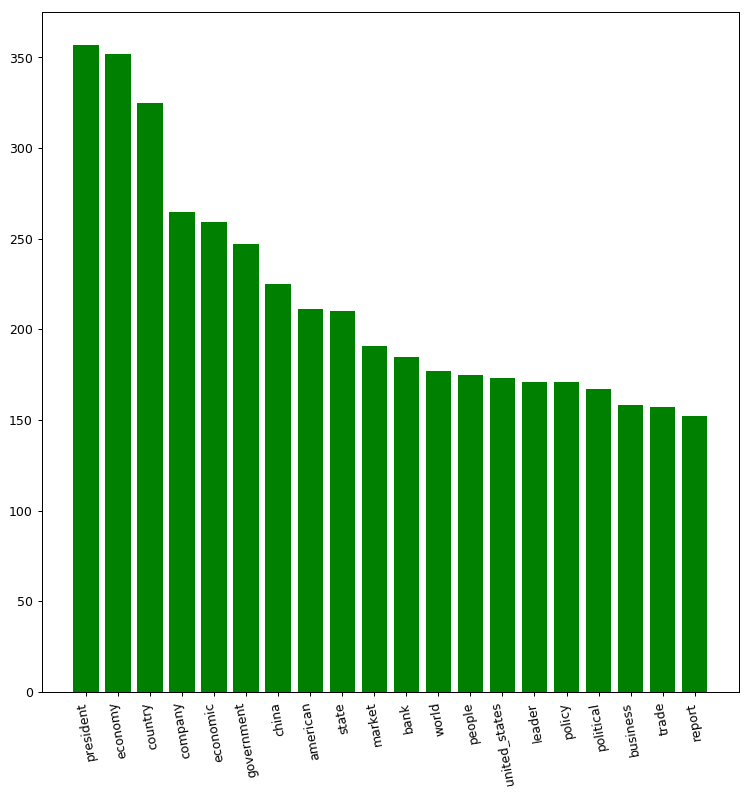

In [27]:
figure(num=None, figsize=(10, 10), dpi=90, facecolor='w', edgecolor='k')
plt.xticks(rotation=100)
plt.bar(list(economy100.keys())[0 : 20], list(economy100.values())[0 : 20], color='g')

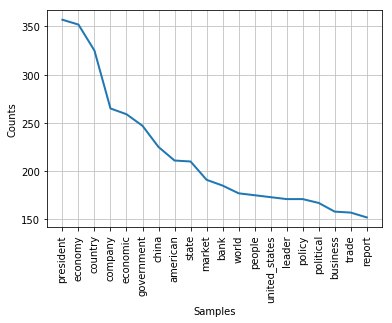

In [28]:
economyFDlemm.plot(20, cumulative=False)

In [29]:
def get_most_frequent(freq, n):
    result = {}
    index = 0
    
    for w in sorted(freq, key=freq.get, reverse=True):
        index += 1
        result[w] = freq[w]
        
        if index == n: 
            break
    
    return result

economyFDstem = FreqDist(dataset_final_stem)

#Most frequent terms in Economy
economy100 = get_most_frequent(economyFDstem, 100)

print('Most frequent terms in Economy (Stemming)\n')
print (economy100)

#original results included {'presid': 579, 'state': 385, 'economi': 373, 'countri': 325, 'trump': 314, 'econom': 313, 'year': 307, 'said': 288, 'would': 286, 'could': 267}
#1st run - revising stopwording with year,said,would,could,need since these words are meaningless)
#2nd run - adding like,time,make

Most frequent terms in Economy (Stemming)

{'presid': 377, 'economi': 352, 'countri': 325, 'econom': 282, 'compani': 265, 'govern': 265, 'china': 225, 'polit': 218, 'bank': 215, 'nation': 214, 'state': 212, 'american': 211, 'report': 205, 'market': 198, 'trade': 191, 'help': 185, 'world': 177, 'peopl': 175, 'united_st': 173, 'leader': 171, 'polici': 171, 'start': 169, 'busi': 163, 'work': 158, 'plan': 153, 'power': 153, 'show': 152, 'percent': 148, 'billion': 146, 'parti': 141, 'year': 140, 'chang': 139, 'citi': 137, 'deal': 137, 'take': 136, 'elect': 135, 'republican': 129, 'president_trump': 129, 'week': 127, 'offer': 125, 'investor': 123, 'offici': 121, 'face': 120, 'price': 120, 'back': 120, 'look': 118, 'move': 117, 'trump': 116, 'chines': 112, 'expect': 112, 'prime_minist': 109, 'first': 108, 'rate': 106, 'growth': 106, 'come': 105, 'financi': 104, 'industri': 103, 'europ': 103, 'democrat': 103, 'say': 102, 'public': 102, 'increas': 102, 'economist': 102, 'issu': 102, 'last': 101

<BarContainer object of 20 artists>

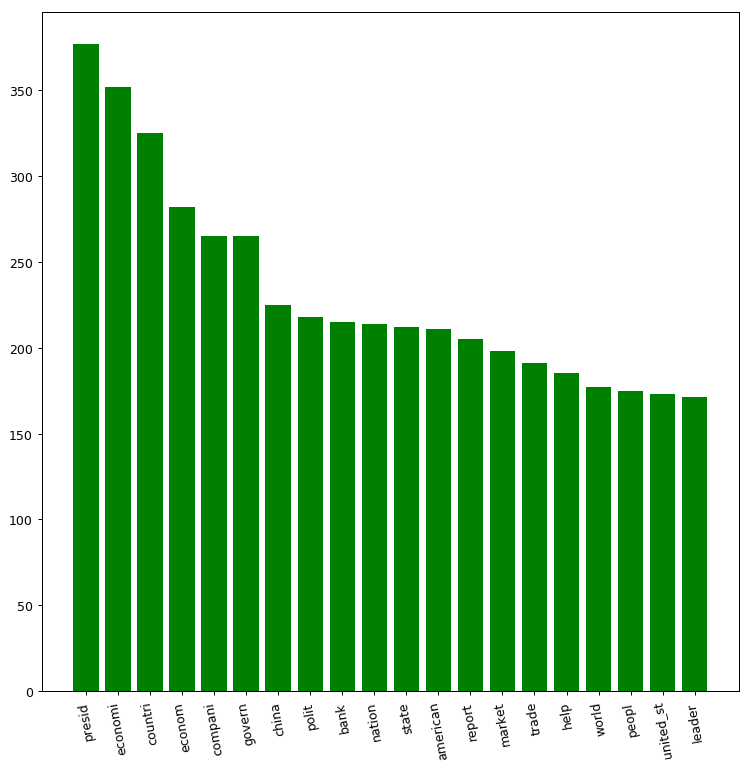

In [30]:
figure(num=None, figsize=(10, 10), dpi=90, facecolor='w', edgecolor='k')
plt.xticks(rotation=100)
plt.bar(list(economy100.keys())[0 : 20], list(economy100.values())[0 : 20], color='g')

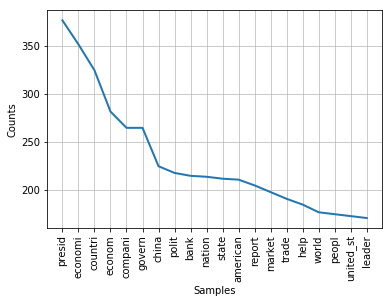

In [31]:
economyFDstem.plot(20, cumulative=False)

In [32]:
#Words that occur only once 
print ('Number of words that occur only once (Lemmatization):', len(economyFDlemm.hapaxes()))
economyFDlemm.hapaxes()

Number of words that occur only once (Lemmatization): 6205


['brahmaputra',
 'hobson',
 'contributor',
 'e-book',
 'piper',
 'hulu',
 'approached',
 'run-up',
 'debevoise',
 'plimpton',
 'hostess',
 'machination',
 'ascendancy',
 'programming',
 'espn',
 'walt',
 'downton',
 'arby',
 'apologizes',
 'chinua',
 'achebe',
 'malaysian',
 'all-electric',
 'karma',
 'promoter',
 'mccormick',
 'forgiveness',
 'debtor',
 '28,000',
 'subscribe',
 'self-reliance',
 'cop',
 'caput',
 'visceral',
 'stingray',
 'corvette',
 'revived',
 'nascar',
 'breast',
 'usefulness',
 'snubbed',
 'oscar',
 'carbon-dioxide',
 'prudent',
 'douglas',
 'tompkins',
 'esprit',
 'ardent',
 'clearwire',
 'a.i.g',
 'frustrated',
 'tape',
 'dump',
 'proceeds',
 'faulty',
 'one-size-fits-all',
 'rafal',
 'milach',
 'delving',
 'ever-evolving',
 'claire',
 'rampell',
 'edict',
 'inhibits',
 'database',
 'hitter',
 'affiliation',
 'charity',
 'fast-rising',
 'washing',
 'emigrate',
 'shocked',
 'spillover',
 'doom-mongers',
 'indecisive',
 'blip',
 'refreshed',
 'durango',
 'teen',


In [33]:
#Words that occur only once 
print ('Number of words that occur only once (Stemming):', len(economyFDstem.hapaxes()))
economyFDstem.hapaxes()

Number of words that occur only once (Stemming): 4661


['brahmaputra',
 'hobson',
 'contributor',
 'e-book',
 'piper',
 'hulu',
 'run-up',
 'debevois',
 'plimpton',
 'hostess',
 'espn',
 'walt',
 'downton',
 'arbi',
 'apolog',
 'chinua',
 'acheb',
 'malaysian',
 'all-electr',
 'karma',
 'mccormick',
 'forgiv',
 'debtor',
 '28,000',
 'subscrib',
 'self-reli',
 'cop',
 'capita',
 'viscer',
 'stingray',
 'corvett',
 'nascar',
 'breast',
 'oscar',
 'carbon-dioxid',
 'prudent',
 'dougla',
 'tompkin',
 'esprit',
 'ardent',
 'clearwir',
 'a.i.g',
 'tape',
 'proce',
 'faulti',
 'one-size-fits-al',
 'rafal',
 'milach',
 'ever-evolv',
 'clair',
 'rampel',
 'edict',
 'inhibit',
 'databas',
 'hitter',
 'chariti',
 'fast-ris',
 'emigr',
 'spillov',
 'doom-mong',
 'indecis',
 'blip',
 'durango',
 'teen',
 'parenthood',
 'paradigm',
 'bergoglio',
 'unafraid',
 'ruffl',
 'feather',
 'vatican',
 'tenfold',
 'shuqe',
 'gérard',
 'depardieu',
 'brigitt',
 'bardot',
 'upwardli',
 'odditi',
 'phonograph',
 'choru',
 'burrito',
 'lip-sync',
 '1959',
 'motown',


In [34]:
# Frequency of short words (Lemmatization)

for token in vocabulary_lemm:
    if (len(token) < 4 and economyFDlemm[token] > 0):
        print ('%s [%s]' % (token, economyFDlemm[token]))

act [3]
add [7]
age [3]
aid [1]
ail [1]
aim [11]
alp [2]
arm [5]
art [5]
ass [3]
ban [2]
bar [1]
bee [1]
bet [3]
bit [1]
bos [3]
box [1]
boy [1]
bum [1]
buy [3]
can [2]
car [30]
cop [1]
cub [1]
cut [36]
dam [1]
day [35]
dip [1]
dog [2]
dry [1]
due [1]
dy [2]
ear [2]
egg [1]
end [8]
eye [4]
fan [5]
fee [9]
foe [2]
fry [1]
gap [6]
gas [4]
gem [1]
get [15]
go [16]
gun [3]
gut [2]
ham [1]
hit [4]
hub [1]
imp [1]
isi [4]
jam [2]
jet [2]
jew [1]
job [74]
kid [4]
lab [1]
law [20]
lay [3]
le [58]
let [1]
lie [7]
lot [3]
mod [1]
net [1]
ngo [1]
oil [1]
one [10]
out [1]
pac [1]
pas [12]
pew [1]
pig [1]
pit [2]
put [4]
red [1]
rom [3]
run [6]
rus [1]
sap [1]
say [83]
sea [3]
see [9]
set [5]
sky [2]
son [2]
spy [1]
sue [1]
sum [1]
tag [1]
tap [2]
tax [46]
ten [8]
tie [19]
tip [7]
ton [3]
top [2]
toy [1]
try [11]
us [4]
van [1]
vow [2]
war [9]
way [37]
win [5]
woe [4]


In [35]:
# Frequency of short words (Stemming)
for token in vocabulary_stem:
    if (len(token) < 4 and economyFDstem[token] > 0):
        print ('%s [%s]' % (token, economyFDstem[token]))

570 [1]
abl [7]
acr [3]
act [7]
ad [22]
add [7]
age [11]
ahm [2]
aid [11]
ail [7]
aim [31]
air [3]
alp [2]
app [5]
apt [1]
arm [11]
art [6]
ask [24]
bag [1]
ban [3]
bar [6]
be [1]
bee [1]
bet [13]
bit [1]
boe [3]
box [2]
boy [1]
bud [2]
bum [1]
buy [16]
can [2]
cap [1]
car [30]
cop [1]
cub [1]
cut [49]
dam [1]
day [35]
die [14]
dim [2]
dip [4]
dog [2]
dri [1]
dub [1]
due [1]
ear [2]
eas [17]
eat [2]
edg [9]
egg [1]
eik [1]
eke [1]
els [10]
end [31]
ewe [1]
eye [5]
fan [6]
fee [9]
fit [2]
fix [3]
fli [1]
foe [2]
fri [1]
gap [6]
gem [1]
get [42]
go [30]
goe [16]
gun [3]
gut [3]
ham [1]
har [1]
hit [9]
hom [1]
hub [1]
hum [1]
idl [3]
ill [2]
imp [1]
isi [4]
jam [2]
jet [2]
jew [1]
job [74]
jot [1]
kid [4]
kri [1]
lab [1]
lag [4]
law [20]
lay [4]
len [10]
let [3]
lie [7]
log [1]
lot [3]
low [1]
lui [1]
lux [1]
map [1]
mar [3]
mix [4]
mod [1]
nag [2]
neg [6]
net [1]
ngo [1]
odd [9]
of [1]
oil [1]
one [10]
onu [1]
op- [5]
opt [1]
out [1]
owe [1]
own [7]
pac [1]
pan [1]
pay [16]
pew [1]
pig [

In [36]:
# Frequency of long words (Lemmatization)
for token in vocabulary_lemm:
    if (len(token)>7 and economyFDlemm[token]>2):
        print ('%s [%s]' % (token, economyFDlemm[token]))

19th-century [4]
abandoned [6]
academic [6]
accelerated [3]
accepted [4]
accepting [4]
accomplishment [3]
according [35]
accountability [5]
accounting [5]
accusation [15]
achievement [7]
acknowledge [4]
acknowledged [4]
acquisition [8]
across-the-board [3]
activist [18]
activity [11]
actually [18]
adaptation [5]
addition [6]
additional [7]
addressing [5]
adjustment [3]
administration [38]
admission [5]
advanced [5]
advantage [9]
adventure [3]
adversary [3]
advertising [4]
advocate [12]
affected [4]
affecting [3]
affiliate [3]
affluent [3]
affordable [9]
affordable_care [23]
afghanistan [3]
african-american [9]
aggression [4]
aggressive [11]
aggressively [5]
agreement [50]
agricultural [4]
agriculture [5]
aircraft [3]
alienate [3]
allegation [3]
alliance [7]
allowing [7]
alternative [9]
although [10]
aluminum [7]
ambassador [8]
ambition [11]
ambitious [13]
ambivalence [4]
american [211]
amounted [4]
analysis [17]
annexing [3]
anniversary [6]
announce [9]
announced [23]
announcement [14]

In [37]:
# Frequency of long words (Stemming)
for token in vocabulary_stem:
    if (len(token)>7 and economyFDstem[token]>2):
        print ('%s [%s]' % (token, economyFDstem[token]))

19th-centuri [4]
accomplish [6]
acknowledg [11]
acquisit [8]
across-the-board [3]
activist [18]
administr [41]
advantag [9]
adventur [4]
adversari [3]
advertis [7]
affluent [3]
affordable_car [23]
afghanistan [3]
african-american [9]
agreement [50]
agricultur [9]
aircraft [3]
although [10]
aluminum [7]
ambassador [8]
american [211]
anniversari [6]
anti-immigr [3]
anticorrupt [3]
antitrust [6]
apartheid [4]
approach [47]
appropri [3]
archbishop [3]
architectur [4]
argentin [3]
argentina [5]
argument [18]
artifici [3]
asia-pacif [3]
attorney [6]
attribut [6]
australia [20]
australian [6]
authoritarian [8]
autocrat [4]
automobil [5]
backdrop [3]
background [4]
backlash [3]
baltimor [4]
bangladesh [3]
bankrupt [3]
bankruptci [13]
behavior [12]
behind-the-scen [3]
benchmark [8]
benjamin [4]
bernie_sand [14]
billionair [12]
bipartisan [6]
blackberri [4]
blackrock [4]
bloomberg [7]
blue-collar [3]
bond-buy [5]
bondhold [4]
boomtown [3]
brazilian [8]
brinkmanship [3]
broadcast [5]
broadway [3]

# Topics of Discussion

In [38]:
import re
import nltk
import gensim
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.collocations import *
from nltk.corpus import stopwords
from gensim import corpora
import pyLDAvis.gensim

C:\Users\faiza\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\tools\datetimes.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping


In [39]:
def remove_utf(text):
    return re.sub(r'[^\x00-\x7f]',r' ', text)

def loadCorpus(path):
    
    data = []
    file_input = open (path,"r")
    lines = file_input.readlines()
    
    for line in lines:
        data.append(remove_utf(line[:-1].lower()))
    
    file_input.close()
    
    return data

fileName = path + "EconomyArticles 2013-2019" #change directory to where you have articles stored
Economy = loadCorpus(fileName)
print (Economy)

['in the brahmaputra river system, planners face a hobson s choice between the twin goals of climate change adaptation and mitigation.', 'the times s washington bureau chief and magazine contributor explains why he decided to write an e-book.', 'too many ships and not enough cargo have sent ship values plummeting. many are not worth what european banks lent to build them.', 'the battle over dell suggests that investors today may be slightly less short-term greedy than previous generations. | a collection of internal e-mails at the law firm dla piper could reinforce a perception that law firms inflate bills. | puerto rico is fashioning a new identity for itself as a tax haven. | a report says that the board of hulu has approached potential buyers.', 'a clip from the marketplace money public radio program about the your money team s continuing search for what college applicants are writing about money.', 'documents in a lawsuit against standard & poor s provide a glimpse at the company s

In [40]:
stop_words = set(stopwords.words("english"))

def remove_punctuation(corpus):
    punctuations = r".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"    
    filtered_corpus = [token for token in corpus if (not token in punctuations)]
    return filtered_corpus

def apply_stopwording(corpus, min_len):
    black_list = ['said','year','would','could','need','said','like','time','make', 'even','know','also','many','say','much','made']
    filtered_corpus = [token for token in corpus if (not token in stop_words and not token in black_list and len(token) > min_len)]
    return filtered_corpus

def apply_lemmatization(corpus):
    lemmatizer = nltk.WordNetLemmatizer()
    normalized_corpus = [lemmatizer.lemmatize(token) for token in corpus]
    return normalized_corpus

def getCollocations(text, min_freq, coll_num):
    
    bigrams = nltk.collocations.BigramAssocMeasures()
    
    finder = BigramCollocationFinder.from_words(text)
    finder.apply_freq_filter(min_freq)
    collocations = finder.nbest(bigrams.pmi, coll_num)
    
    return collocations

def replaceCollocationsInText(text, collocations):
    first = [t[0] for t in collocations]
    second = [t[1] for t in collocations]

    dtokens = []
    i = 0
    
    while i <= (len(text)-1):
        try:
            idx1 = first.index(text[i])
            
            if (text[i + 1] == second[idx1]):
                
                dtokens.append(first[idx1] + "_" + second[idx1])
                i = i + 1
        except:
            dtokens.append(text[i])
            pass
        
        i = i + 1 
        
    return dtokens

def processCorpus(corpus_data):
    #The input is an array of unprocessed text documents
    min_frequency = 3
    num_of_collocations = 100
    
    text = ""
    corpus = []
    tokens = []
    
    #Extract corpus and preprocess data
    for line in corpus_data:
       
        t = nltk.word_tokenize(line)
        
        doc = nltk.Text(t)
        
        #Apply Lemmatization
        doc_clean = nltk.Text(apply_lemmatization(apply_stopwording(remove_punctuation(doc), 3)))
        
        corpus.append(doc_clean)
        tokens.extend(doc_clean.tokens)
        text = text + line
    
    #Identify collocations
    collocations = getCollocations(tokens, min_frequency, num_of_collocations)
    docs = []
    
    for doc in corpus:
        
        t = replaceCollocationsInText(doc, collocations)
        
        if (len(t) > 0):
            docs.append(replaceCollocationsInText(doc, collocations))
            
    return docs

In [41]:
docs = processCorpus(Economy)
print (len(docs))
print (docs[0 : 10])

5547
[['brahmaputra', 'river', 'system', 'planner', 'face', 'hobson', 'choice', 'twin', 'goal', 'climate', 'change', 'adaptation', 'mitigation'], ['time', 'washington', 'bureau', 'chief', 'magazine', 'contributor', 'explains', 'decided', 'write', 'e-book'], ['ship', 'enough', 'cargo', 'sent', 'ship', 'value', 'plummeting', 'worth', 'european', 'bank', 'lent', 'build'], ['battle', 'dell', 'suggests', 'investor', 'today', 'slightly', 'le', 'short-term', 'greedy', 'previous', 'generation', 'collection', 'internal', 'e-mail', 'firm', 'piper', 'reinforce', 'perception', 'firm', 'inflate', 'bill', 'rico', 'fashioning', 'identity', 'report', 'say', 'board', 'hulu', 'approached', 'potential', 'buyer'], ['clip', 'marketplace', 'money', 'public', 'radio', 'program', 'money', 'team', 'continuing', 'search', 'college', 'applicant', 'writing', 'money'], ['document', 'lawsuit', 'standard', 'poor', 'provide', 'glimpse', 'company', 'inner', 'working', 'run-up', 'financial', 'crisis', 'royal', 'bank', 

In [42]:
k = 3
iterations = 40

dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]

topic_model = gensim.models.ldamodel.LdaModel(corpus, num_topics = k, id2word = dictionary, passes = iterations)
lda_vis = pyLDAvis.gensim.prepare(topic_model, corpus, dictionary, sort_topics = False)

print('Topics : Lemmatization')
pyLDAvis.display(lda_vis)

C:\Users\faiza\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Topics : Lemmatization


In [43]:
stop_words = set(stopwords.words("english"))

def remove_punctuation(corpus):
    punctuations = r".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"    
    filtered_corpus = [token for token in corpus if (not token in punctuations)]
    return filtered_corpus

def apply_stopwording(corpus, min_len):
    black_list = ['said','year','would','could','need','said','like','time','make', 'even','know','also','many','say','much','made']
    filtered_corpus = [token for token in corpus if (not token in stop_words and not token in black_list and len(token) > min_len)]
    return filtered_corpus

def apply_stemming(corpus):
    stemmer = nltk.PorterStemmer()
    normalized_corpus = [stemmer.stem(token) for token in corpus]
    return normalized_corpus

def getCollocations(text, min_freq, coll_num):
    
    bigrams = nltk.collocations.BigramAssocMeasures()
    
    finder = BigramCollocationFinder.from_words(text)
    finder.apply_freq_filter(min_freq)
    collocations = finder.nbest(bigrams.pmi, coll_num)
    
    return collocations

def replaceCollocationsInText(text, collocations):
    first = [t[0] for t in collocations]
    second = [t[1] for t in collocations]

    dtokens = []
    i = 0
    
    while i <= (len(text)-1):
        try:
            idx1 = first.index(text[i])
            
            if (text[i + 1] == second[idx1]):
                
                dtokens.append(first[idx1] + "_" + second[idx1])
                i = i + 1
        except:
            dtokens.append(text[i])
            pass
        
        i = i + 1 
        
    return dtokens

def processCorpus(corpus_data):
    #The input is an array of unprocessed text documents
    min_frequency = 3
    num_of_collocations = 100
    
    text = ""
    corpus = []
    tokens = []
    
    #Extract corpus and preprocess data
    for line in corpus_data:
       
        t = nltk.word_tokenize(line)
        
        doc = nltk.Text(t)
        
        # Apply Stemming
        doc_clean = nltk.Text(apply_stemming(apply_stopwording(remove_punctuation(doc), 3)))
        
        corpus.append(doc_clean)
        tokens.extend(doc_clean.tokens)
        text = text + line
    
    #Identify collocations
    collocations = getCollocations(tokens, min_frequency, num_of_collocations)
    docs = []
    
    for doc in corpus:
        
        t = replaceCollocationsInText(doc, collocations)
        
        if (len(t) > 0):
            docs.append(replaceCollocationsInText(doc, collocations))
            
    return docs

In [44]:
k = 3
iterations = 40

dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]

topic_model = gensim.models.ldamodel.LdaModel(corpus, num_topics = k, id2word = dictionary, passes = iterations)
lda_vis = pyLDAvis.gensim.prepare(topic_model, corpus, dictionary, sort_topics = False)

print('Topics : Stemming')
pyLDAvis.display(lda_vis)

C:\Users\faiza\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Topics : Stemming


In [45]:
k = 5
iterations = 40

dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]

topic_model = gensim.models.ldamodel.LdaModel(corpus, num_topics = k, id2word = dictionary, passes = iterations)
lda_vis = pyLDAvis.gensim.prepare(topic_model, corpus, dictionary, sort_topics = False)

pyLDAvis.display(lda_vis)

C:\Users\faiza\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


# Sentiment Analysis

In [46]:
from textblob import TextBlob
import pandas as pd
from columnar import columnar
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

In [47]:
tblog = TextBlob("Its horrible! I hate it")
print (tblog.noun_phrases)
print (tblog.sentiment)

[]
Sentiment(polarity=-0.9, subjectivity=0.95)


In [48]:
year = 2013
quarter = 1
quarterlySentiment = []

quarterlySentiment.append(['4Q2012', 0])

for x in range(28):
    
    fileName = path + str(quarter) + "Q" + str(year) + "training_economy"

    f = open(fileName,'r')
    text = ''
    text_raw = ''    
    lines = f.readlines()

    overallSentiment = 0

    for line in lines:
        
        text += line.replace('\n',' ').lower()
        text_raw = line.lower()
        tblob = TextBlob(text_raw)
        
        # Multiply by 5 to exaggerate the difference in sentiment between quarters 
        overallSentiment += tblob.sentiment[0]
        
        #print(text_raw, tblob.sentiment)
        #print()

    f.close

    print('Sentiment for ' + str(quarter) + 'Q ' + str(year))
    print(overallSentiment * 5,'\n')
    quarterlySentiment.append([str(quarter) + 'Q ' + str(year), overallSentiment * 5])
    
    
    if quarter == 4:
        quarter = 1
        year += 1
    else:
        quarter += 1


Sentiment for 1Q 2013
84.62380243764174 

Sentiment for 2Q 2013
45.385465754483604 

Sentiment for 3Q 2013
41.72892847892848 

Sentiment for 4Q 2013
57.46070526695529 

Sentiment for 1Q 2014
64.38984788359785 

Sentiment for 2Q 2014
68.85069895382398 

Sentiment for 3Q 2014
46.225214947089945 

Sentiment for 4Q 2014
71.71357323232327 

Sentiment for 1Q 2015
76.95653860028862 

Sentiment for 2Q 2015
57.08659060846564 

Sentiment for 3Q 2015
65.49381313131309 

Sentiment for 4Q 2015
67.92653820716322 

Sentiment for 1Q 2016
66.98103024290525 

Sentiment for 2Q 2016
71.60338203463203 

Sentiment for 3Q 2016
71.00314754689754 

Sentiment for 4Q 2016
72.9465728715729 

Sentiment for 1Q 2017
51.36069410087266 

Sentiment for 2Q 2017
57.6904295935546 

Sentiment for 3Q 2017
71.47146013708512 

Sentiment for 4Q 2017
56.34423509991692 

Sentiment for 1Q 2018
70.66699712324713 

Sentiment for 2Q 2018
74.39353655603652 

Sentiment for 3Q 2018
58.07661736411737 

Sentiment for 4Q 2018
69.329274891

In [49]:
fileName = path + 'SP500_Quarterly_Prices V3.csv '


df = pd.read_csv(fileName, encoding = "latin-1")
data = df.values.tolist()

header = ['Date', 'SP500', 'Performance (Over the Qtr)']
    
table = columnar(data, header, no_borders=True)
print(table)

        
  DATE       SP500               PERFORMANCE (OVER THE QTR)  
    
  10/1/2012  1418.139032         6.76%                       
  1/1/2013   1513.98             6.31%                       
  4/1/2013   1609.49125          4.07%                       
  7/1/2013   1674.9435939999998  5.60%                       
  10/1/2013  1768.6673440000002  3.74%                       
  1/1/2014   1834.871148         3.57%                       
  4/1/2014   1900.3726980000001  3.97%                       
  7/1/2014   1975.908125         1.69%                       
  10/1/2014  2009.344375         2.70%                       
  1/1/2015   2063.689836         1.85%                       
  4/1/2015   2101.829048         -3.55%                      
  7/1/2015   2027.2              1.24%                       
  10/1/2015  2052.311875         -4.93%                      
  1/1/2016   1951.224918         6.35%                       
  4/1/2016   2075.131563         4.19%                  

In [50]:
sentimentData = []

for x in range(1, len(data) - 1):
    #print(data[x][0], str(data[x][1])[0 : 6], data[x][2][0 : 4] + '%', str(quarterlySentiment[x][1])[0 : 4])
    
    if x == 1:
        
        sentimentChange = '0%'
    
    elif x >= 2 and x < len(quarterlySentiment) - 1:
        sentimentChange = str(((quarterlySentiment[x][1] - quarterlySentiment[x - 1][1]) / quarterlySentiment[x - 1][1]) * 100)[0 : 5] + '%'
    else: 
        sentimentChange = '-'

    sentimentData.append([data[x][0], str(data[x][1])[0 : 6], data[x][2][0 : 4] + '%', str(quarterlySentiment[x][1])[0 : 4], sentimentChange])

In [51]:
# Performance indicates how much the SP500 went up or down over the course of the current quarter
# Sentiment change represents how much the sentiment changed from the previous quarter

header = ['Date', 'SP500', 'Performance', 'Raw Sentiment', 'Sentiment Change']
    
table = columnar(sentimentData, header, no_borders=True)
print(table)

            
  DATE       SP500   PERFORMANCE  RAW SENTIMENT  SENTIMENT CHANGE  
    
  1/1/2013   1513.9  6.31%        84.6           0%                
  4/1/2013   1609.4  4.07%        45.3           -46.3%            
  7/1/2013   1674.9  5.60%        41.7           -8.05%            
  10/1/2013  1768.6  3.74%        57.4           37.69%            
  1/1/2014   1834.8  3.57%        64.3           12.05%            
  4/1/2014   1900.3  3.97%        68.8           6.927%            
  7/1/2014   1975.9  1.69%        46.2           -32.8%            
  10/1/2014  2009.3  2.70%        71.7           55.13%            
  1/1/2015   2063.6  1.85%        76.9           7.310%            
  4/1/2015   2101.8  -3.5%        57.0           -25.8%            
  7/1/2015   2027.2  1.24%        65.4           14.72%            
  10/1/2015  2052.3  -4.9%        67.9           3.714%            
  1/1/2016   1951.2  6.35%        66.9           -1.39%            
  4/1/2016   2075.1  4.19%    

In [52]:
data = []

df = pd.DataFrame(sentimentData)

rawSentiment = list(df[3])
spyPerformance = list(df[2])
sentimentChange = list(df[4])

for x in range(len(rawSentiment)):
    data.append([rawSentiment[x], spyPerformance[x], sentimentChange[x]])
    
data = sorted(data, key = lambda x: float(x[0]), reverse = True)
print(data)

[['84.6', '6.31%', '0%'], ['76.9', '1.85%', '7.310%'], ['74.3', '5.42%', '5.273%'], ['72.9', '6.46%', '2.737%'], ['71.8', '2.62%', '56.11%'], ['71.7', '2.70%', '55.13%'], ['71.6', '4.19%', '6.900%'], ['71.4', '5.52%', '23.88%'], ['71.0', '1.06%', '-0.83%'], ['70.6', '-1.1%', '25.42%'], ['69.3', '0.82%', '19.37%'], ['68.8', '3.97%', '6.927%'], ['67.9', '-4.9%', '3.714%'], ['66.9', '6.35%', '-1.39%'], ['65.4', '1.24%', '14.72%'], ['64.3', '3.57%', '12.05%'], ['58.0', '-5.2%', '-21.9%'], ['57.6', '2.89%', '12.32%'], ['57.4', '3.74%', '37.69%'], ['57.0', '-3.5%', '-25.8%'], ['56.3', '5.00%', '-21.1%'], ['51.3', '3.10%', '-29.5%'], ['46.2', '1.69%', '-32.8%'], ['45.9', '5.93%', '-33.6%'], ['45.3', '4.07%', '-46.3%'], ['41.7', '5.60%', '-8.05%'], ['41.2', '4.22%', '-42.5%']]


In [53]:
rawSentiment = list([float(i[0]) for i in data])
spyPerformance = list(float(i[1][:-1]) for i in data)
sentimentChange = list(float(i[2][:-1]) for i in data)

Pearsons correlation: -0.010


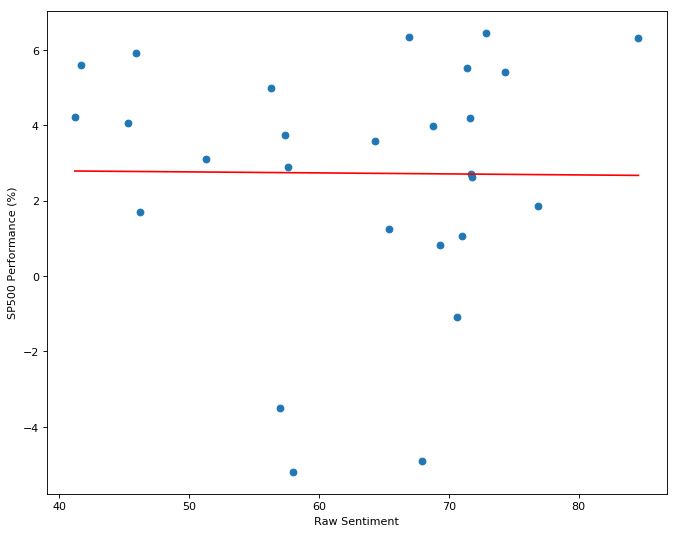

In [54]:
from sklearn.linear_model import LinearRegression

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(rawSentiment, spyPerformance, 'o')

#Regression Line
plt.plot(np.unique(rawSentiment), np.poly1d(np.polyfit(rawSentiment, spyPerformance, 1))(np.unique(rawSentiment)), color='red')

plt.xlabel('Raw Sentiment')
plt.ylabel('SP500 Performance (%)')

corr, _ = pearsonr(rawSentiment, spyPerformance)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.660


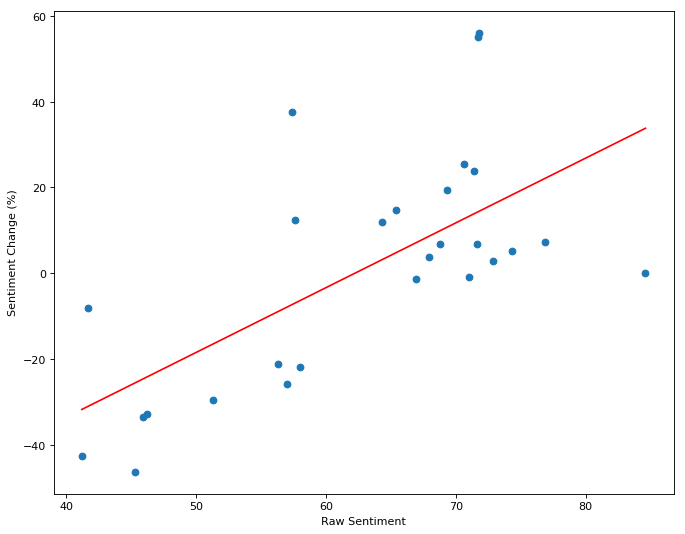

In [55]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(rawSentiment, sentimentChange, 'o')

#Regression Line
plt.plot(np.unique(rawSentiment), np.poly1d(np.polyfit(rawSentiment, sentimentChange, 1))(np.unique(rawSentiment)), color='red')

plt.xlabel('Raw Sentiment')
plt.ylabel('Sentiment Change (%)')

corr, _ = pearsonr(rawSentiment, sentimentChange)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.005


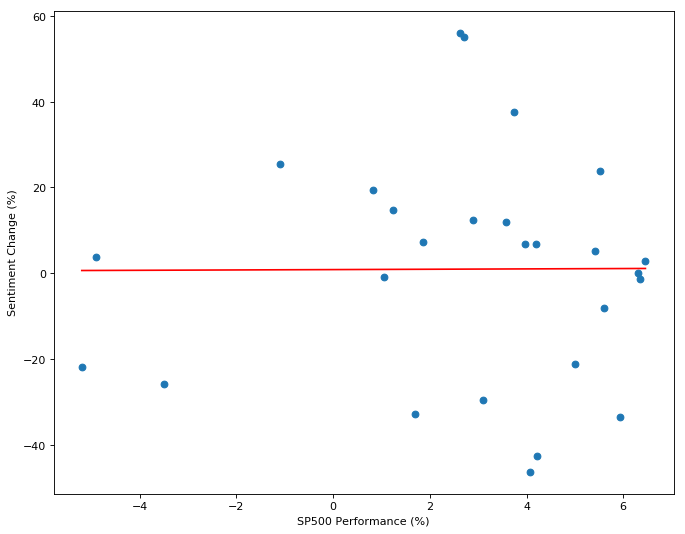

In [56]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(spyPerformance, sentimentChange, 'o')

#Regression Line
plt.plot(np.unique(spyPerformance), np.poly1d(np.polyfit(spyPerformance, sentimentChange, 1))(np.unique(spyPerformance)), color='red')

plt.xlabel('SP500 Performance (%)')
plt.ylabel('Sentiment Change (%)')

corr, _ = pearsonr(spyPerformance, sentimentChange)
print('Pearsons correlation: %.3f' % corr)